**PRESENTACIÓN DEL PROBLEMA**

En el presente trabajo, se desarrolla un análisis de los datos correspondientes a los usuarios del sistema bancario/crediticio que cuentan con préstamos actualmente. El dataset contiene información sobre más de 32.000 registros y 12 variables. La finalidad de este trabajo será conocer cuáles son las variables que más afectan al status(default o no) de un préstamo, y poder armar un modelo que detecte en base a las variables más relevantes si un potencial cliente entrará en default o no. Nuestro problema es de clasificación.

**DATASET**

Credit Risk Dataset (https://www.kaggle.com/datasets/laotse/credit-risk-dataset)





#  **Montando el DataSet e importando librerías**

In [26]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as ex
import plotly.graph_objects as go
from seaborn import boxplot
from seaborn import violinplot
from matplotlib.ticker import FormatStrFormatter
from plotly.subplots import make_subplots
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as XGBoost
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_auc_score, classification_report, roc_curve, precision_score, f1_score, recall_score
from yellowbrick.classifier import ConfusionMatrix
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

import os
import io
import requests
import warnings
warnings.filterwarnings("ignore")
mpl.style.use('bmh')


In [27]:
#Carga de datos y muestra de las primeras 5 filas
df=pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


#**Diccionario de Variables:**



person_age = Edad de la persona tomadora del prestamo

person_income = Ingreso anual de la persona tomadora del prestamo

person_home_ownership = si la persona posee casa, alquila o tiene hipoteca

person_emp_length = cuantos años lleva la persona en su trabajo

loan_intent = destino del prestamo

loan_grade = grado del prestamo

loan_amnt = monto del prestamo otorgado

loan_int_rate = tasa de interes del prestamo

loan_status = 0 es no default, 1 es default

loan_percent_income = cuanto % del ingreso anual del cliente representa el prestamo

cb_person_default_on_file = yes or no, default historico

cb_person_cred_hist_length = longitud de la historia crediticia de la persona

# **Limpieza de datos**

Consiste en la manipulación, limpieza y unificación de conjuntos de datos complejos y desordenados para facilitar su acceso, análisis y modelado. El proceso incluye convertir y mapear los datos crudos, y dejarlos en un formato más adecuado para su uso.

Tenemos consideración especial es este apartado ya que entendemos que aproximadamente el 60% del esfuerzo de un trabajo de Data Science consiste en Data Wrangling.

Las etapas se componen en descubrimiento, estructuración, limpieza, enriquecimiento, validación, pubicación.



In [28]:
#Obtenemos informacion de las columnas de datos.
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [6]:
#Shape o Forma del dataset.
df.shape

(32581, 12)

In [30]:
# Cantidad de filas por columnas
df.count()

#Aca encontramos que la duración de las personas en el empleo (person_emp_lenght) y que el interes de los prestamos (loan_int_rate) presentan algunos valores faltantes

person_age                    32581
person_income                 32581
person_home_ownership         32581
person_emp_length             31686
loan_intent                   32581
loan_grade                    32581
loan_amnt                     32581
loan_int_rate                 29465
loan_status                   32581
loan_percent_income           32581
cb_person_default_on_file     32581
cb_person_cred_hist_length    32581
dtype: int64

In [31]:
#Revisamos el total de datos faltantes en las columnas con nulos

df.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [32]:
#Realiza el calculo porcentual de los nulos, castea los que son 0 y los ordena de menor a mayor.
null_porciento = 100*(df.isnull().sum()/len(df))
null_porciento = null_porciento[null_porciento>0].sort_values()
null_porciento

person_emp_length    2.747000
loan_int_rate        9.563856
dtype: float64

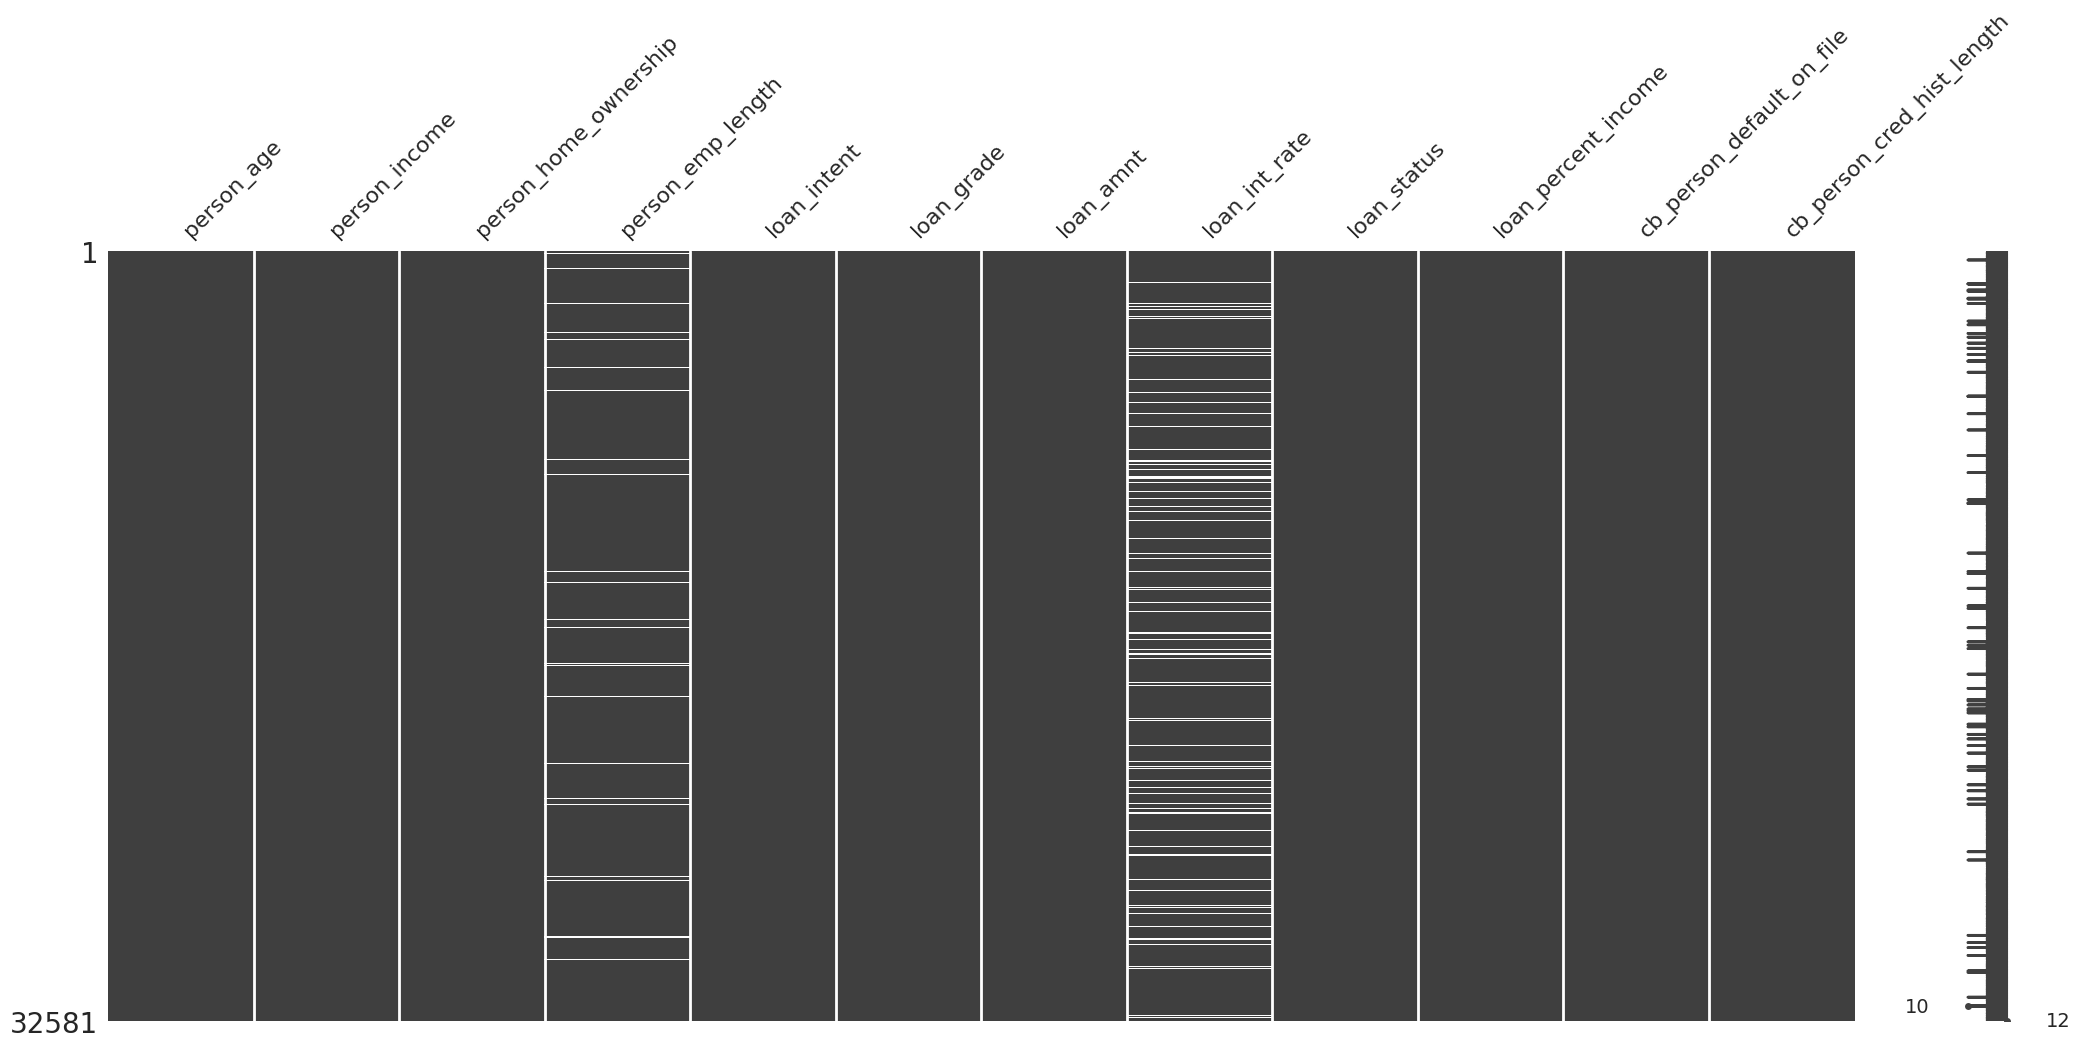

In [33]:
#Utilizacion de libreria missingno para visualizar valores NULL.
msno.matrix(df)
plt.show()

In [34]:
nulos_emp_length = df[df['person_emp_length'].isnull()]
nulos_emp_length.head(5)
#Aca entendemos que los valores nulos corresponden a personas que estan recien ingresados en su nuevo trabajo

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


In [35]:
#Lo llenamos con 0 dado que tienen nula antiguedad en su trabajo

df['person_emp_length']=df['person_emp_length'].fillna(0)

In [36]:
#En tanto que para los nulos de tasa de interes, calculamos la mediana del resto de la base de datos y aplicamos dicho numero a los nulos

#Optamos por utilizar la mediana dado que cuando los datos no se ajustan a una distribución normal es más correcto utilizar la mediana.
#Esto es así­ porque la mediana es mucho más robusta, lo que quiere decir que se afecta menos por la presencia de sesgos en la distribución o de valores extremos.
df['loan_int_rate'].median()
df['loan_int_rate']=df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [37]:
#Corroboramos no tener ningun nulo luego de las modificaciones
pd.options.display.max_rows = None
df.isnull().sum().sort_values()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [38]:
#Tipo de datos en cada columna
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [39]:
#Graficamos un describe con colores gradientes para visualizar posibles outliers
temp = df.describe()
temp.style.background_gradient(cmap='Oranges')

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,66074.848470,4.658114,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,61983.119168,4.159669,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,79200.000000,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6000000.000000,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<Axes: >

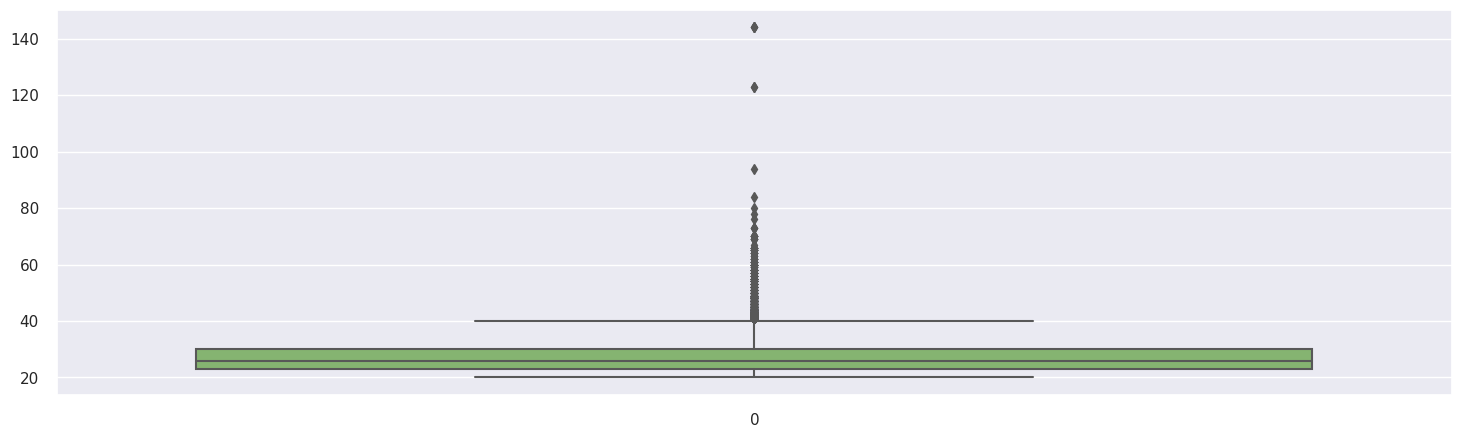

In [40]:
sns.set(rc = {"figure.figsize" : (18,5)})

sns.boxplot(df["person_age"], palette="summer")

<Axes: >

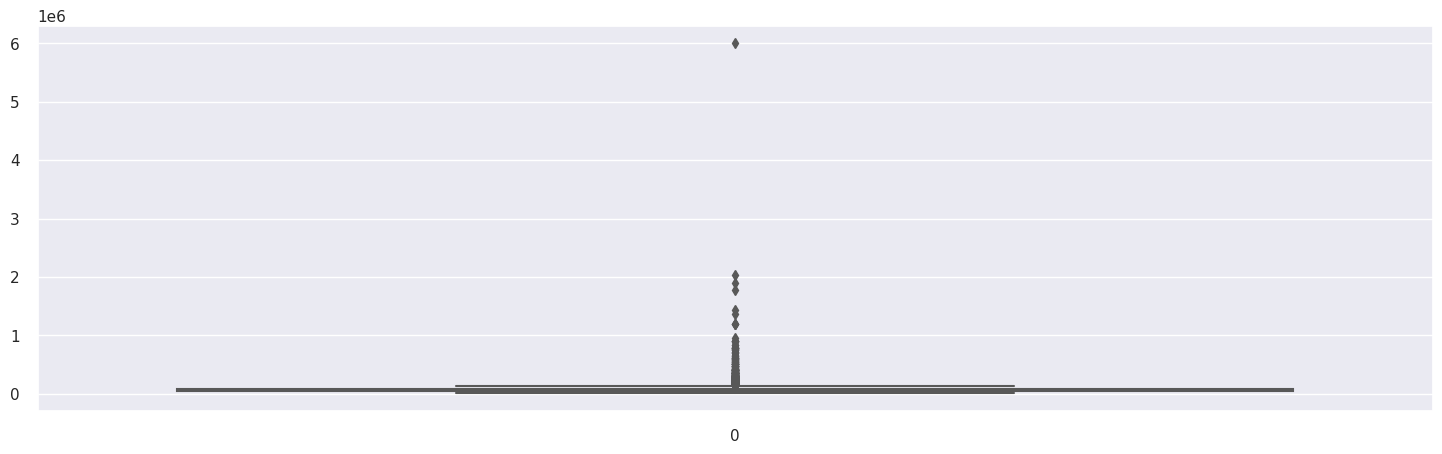

In [41]:
sns.set(rc = {"figure.figsize" : (18,5)})

sns.boxplot(df["person_income"], palette="summer")

<Axes: >

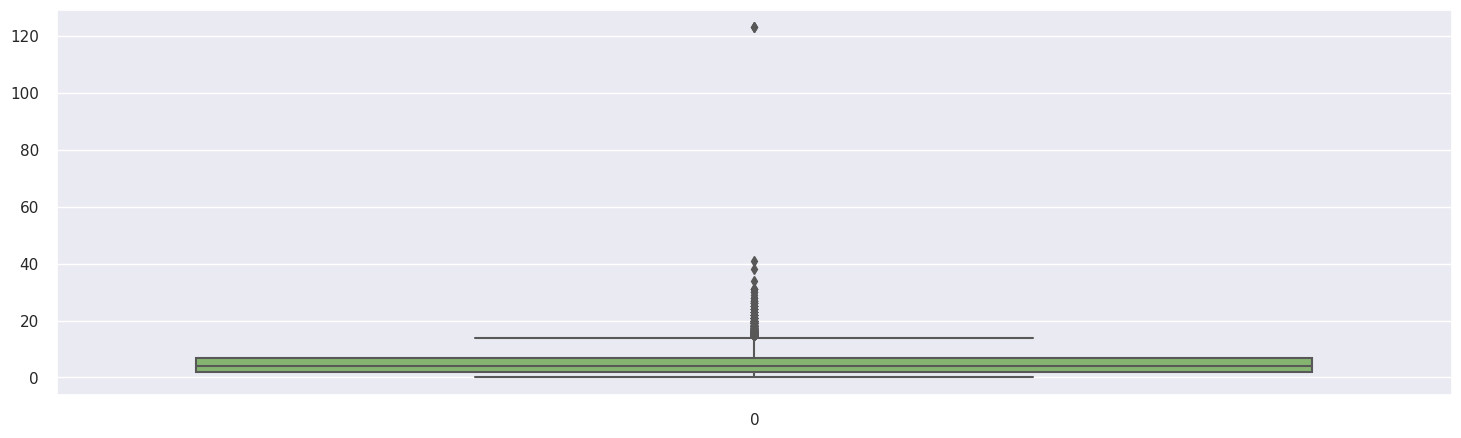

In [19]:
sns.boxplot(df["person_emp_length"], palette="summer")


In [42]:
#Debido a la presencia de outliers en edad, duracion en el empleo e ingreso, le ponemos un máximo de 80 años para los solicitantes de crédito, de 800.000 anuales al ingreso y de 30 años de duración en el empleo

df = df[df['person_age'] <= 80]
df['person_age'].max()


80

In [43]:
#Debido a la presencia de outliers en edad, duracion en el empleo e ingreso, le ponemos un máximo de 80 años para los solicitantes de crédito, de 800.000 anuales al ingreso y de 30 años de duración en el empleo

df = df[df['person_income'] <= 800000]
df['person_income'].max()

800000

In [44]:
#Debido a la presencia de outliers en edad, duracion en el empleo e ingreso, le ponemos un máximo de 80 años para los solicitantes de crédito, de 800.000 anuales al ingreso y de 30 años de duración en el empleo

df = df[df['person_emp_length'] <= 30]
df['person_emp_length'].max()

30.0

**CONCLUSIONES Limpieza de datos**

- Trabajamos con un dataset que cuenta 32051 registros y 12 columnas con atributos de cada cliente.
- Se detectan valores faltantes en las variables loan_int_rate (tasa de interés del crédito) y person_emp_lenght (antiguedad del cliente en su trabajo).
- En la tasa de interés del crédito, los valores faltantes ascienden a casi el 9.5% de la base. Dado que no tiene una distribución normal, optamos por calcular la mediana de la variable, y aplicarla a los missing values.
- Mientras que en la duración del cliente en su trabajo, reemplazamos por 0 dado que entendemos que son personas recién ingresadas en su trabajo. Por lo tanto la duración es de 0 años. En esta variable, los missing values ascendían a un poco más del 2% del total.

- Se detectan valores outliers en las variables person_age (edad del cliente), person_income (ingreso anual del cliente), y person_emp_lenght (la ya mencionada antiguedad del cliente en su trabajo).
- Tras visualizarlos en gráficos, y dado a los clientes que brindamos nuestro servicio, curamos el dataset con los siguientes items:
    - Limitamos la edad máxima a 80 años, dado que no nos interesan clientes mayores.
    - Colocamos un ingreso máximo de 800.000 USD anuales, avisandole a los clientes que contraten nuestros servicios, que deberían otorgar un status premium (prestamo casi automatico, se deberia chequear su destino y su situación global financiera) a aquellos potenciales clientes que se presenten con ingresos demostrables mayor a este número.
    - Finalmente, para la antiguedad de una persona en su trabajo, dejamos un máximo de 30 años.

# **Análisis Exploratorio de Datos (EDA)**

Una vez que tenemos la base de datos limpia y curada, realizamos un segundo análisis de los datos, con foco en nuestra variable target (loan_status) dado que nuestro objetivo será conocer si un crédito entrará en default o no.

In [46]:
#Conocemos el estado de los créditos
df.loan_status.value_counts() / len(df) * 100


0    78.1683
1    21.8317
Name: loan_status, dtype: float64

In [47]:
#Graficamos el estado de los créditos
ex.pie(df,names='loan_status',title='Loan Status',hole=0.33)



In [48]:
#Graficamos el destino de los créditos
ex.pie(df,names='loan_intent',title='Loan Intent',hole=0.33)

In [49]:
#Nuestro principal objetivo es conocer si un crédito entrara en default o no, así que veremos las principales correlaciones con el status del crédito
cor_target = df.corrwith(df["loan_status"])
cor_target.sort_values(axis = 0, ascending = False)

loan_status                   1.000000
loan_percent_income           0.379115
loan_int_rate                 0.319328
loan_amnt                     0.105439
cb_person_cred_hist_length   -0.014710
person_age                   -0.019749
person_emp_length            -0.090523
person_income                -0.188815
dtype: float64

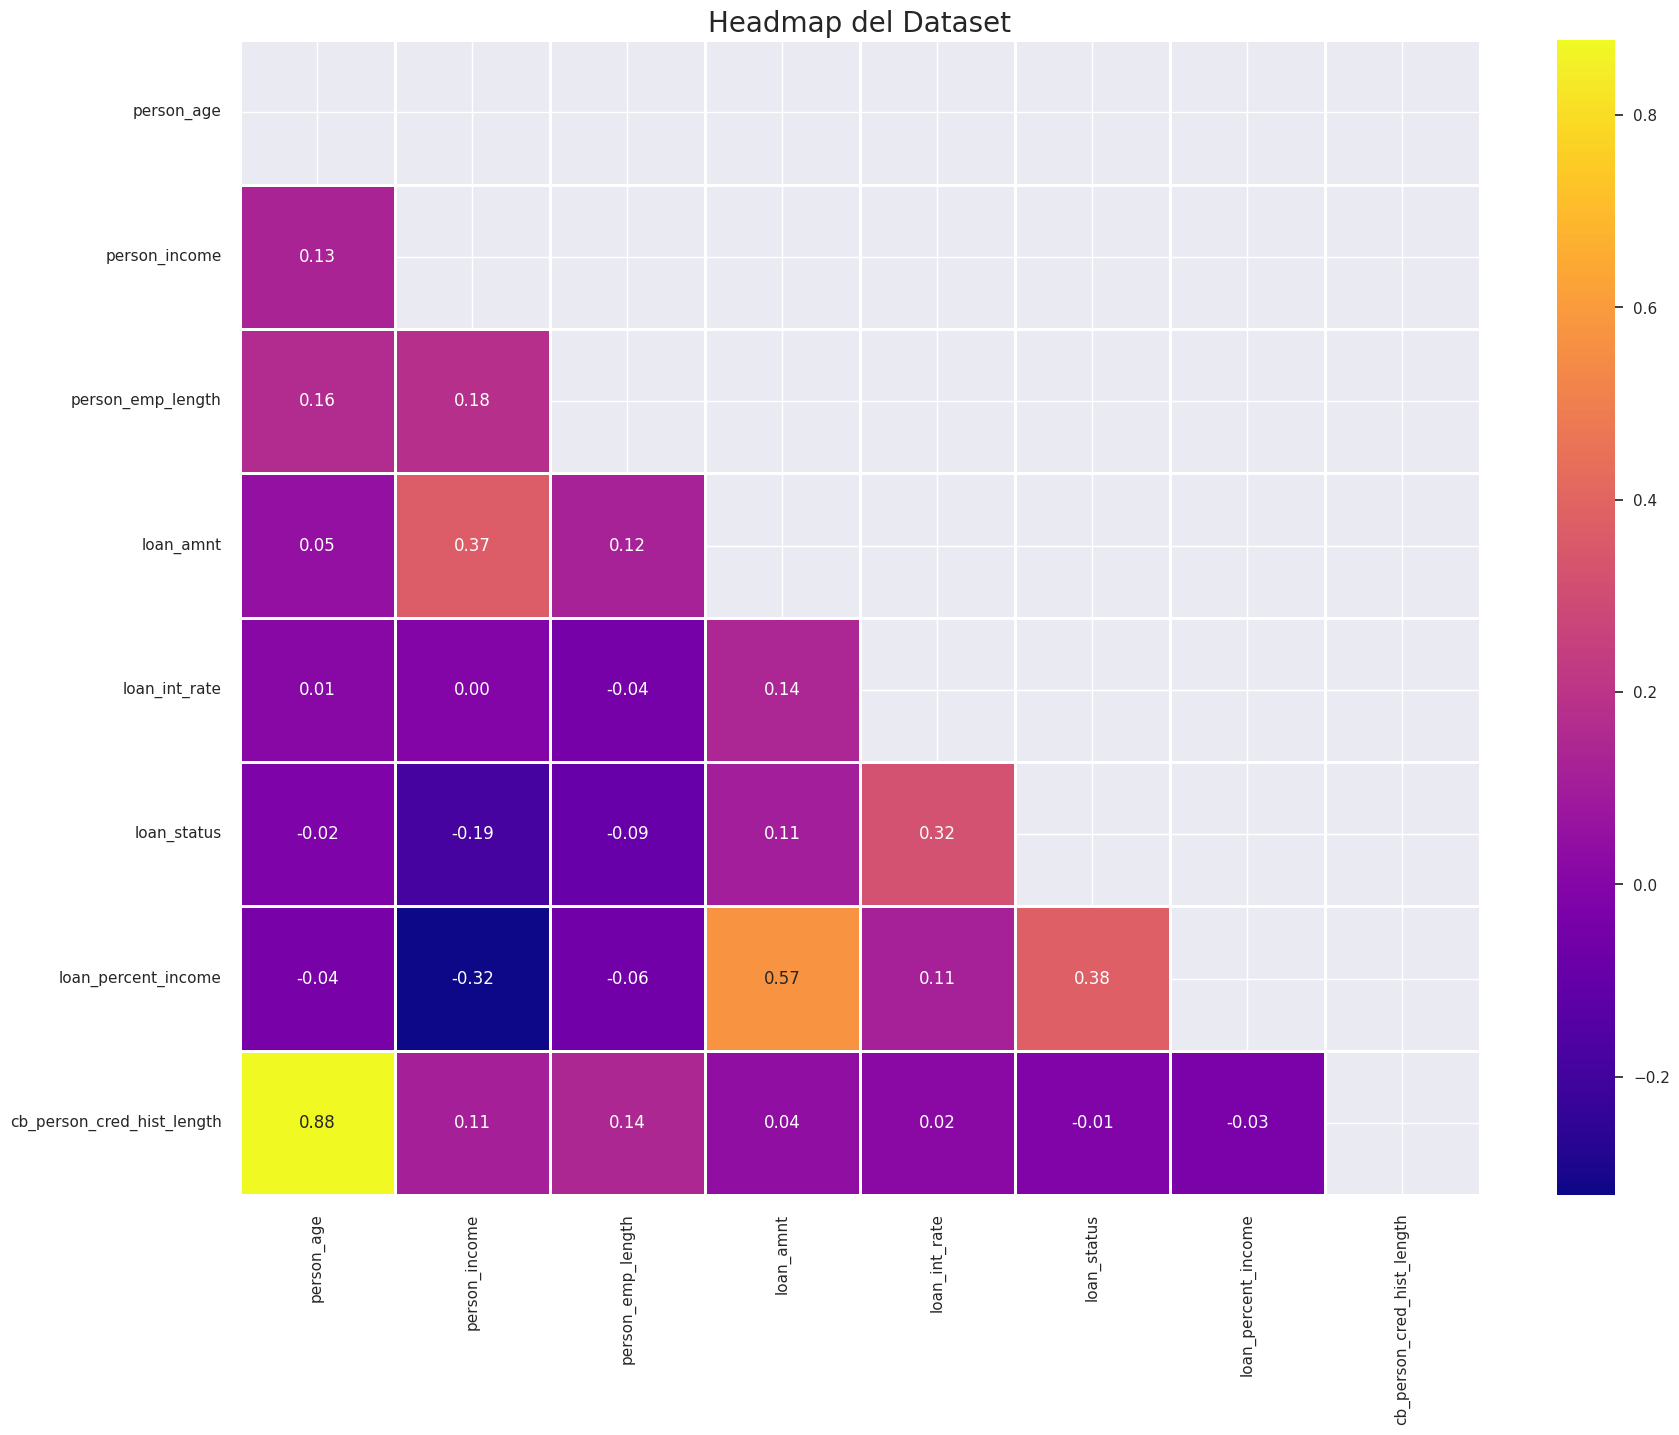

In [50]:
plt.rcParams['figure.figsize'] = (20,15)
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.title('Headmap del Dataset', fontsize = 20)
plt.show()

In [51]:
#Calculamos la media de edad de los clientes
df['person_age'].mean()

27.701404036990382

In [52]:
#Calculamos el monto medio del crédito
df['loan_amnt'].mean()

9586.811422777966

In [53]:
#Mostramos el % de créditos por calidad del mismo
df['loan_grade'].value_counts('0')

A    0.330794
B    0.320716
C    0.198193
D    0.111309
E    0.029617
F    0.007404
G    0.001966
Name: loan_grade, dtype: float64

In [54]:
#Mostramos si los clientes son dueños de su casa, alquilan o tienen una hipoteca
df['person_home_ownership'].value_counts('0')

RENT        0.504962
MORTGAGE    0.412424
OWN         0.079327
OTHER       0.003287
Name: person_home_ownership, dtype: float64

In [55]:
#Le damos nombre a 1 y 0, como deudor y no deudor

debtor = df[df['loan_status'] == 1]
no_debtor = df[df['loan_status'] == 0]

In [56]:
#Graficamos donde gastan el dinero obtenido aquellos clientes que no estan al día (deudores)

fig1 = px.histogram(debtor,x='loan_intent',color='loan_intent', template = "plotly_white")
fig1.show()

In [57]:
#Observamos que la mayor cantidad de deudores es gente menor a 30 años

fig2 = px.histogram(debtor,x='person_age',color='person_age',template='plotly_white')
fig2.show()

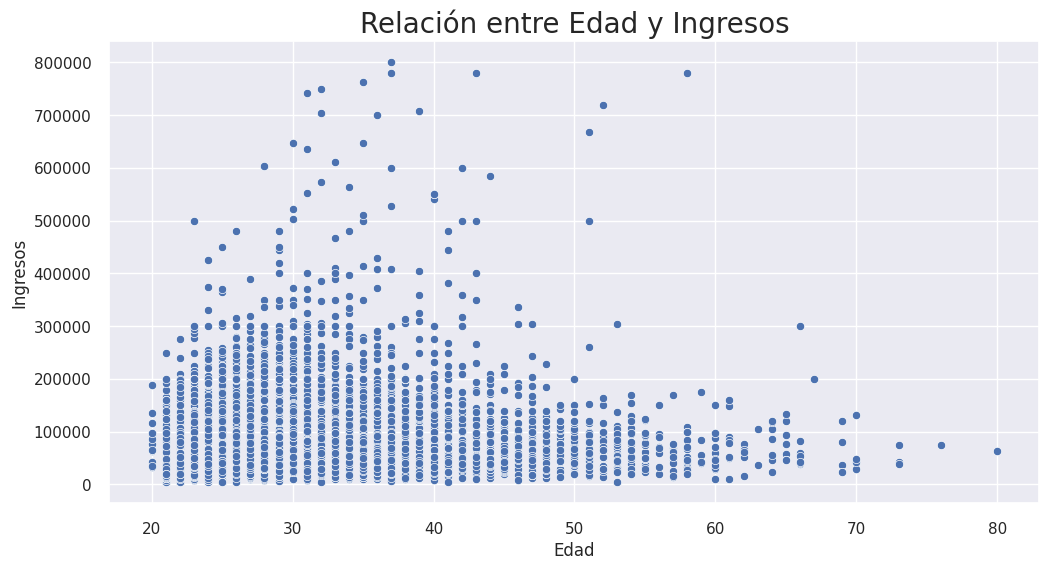

In [58]:
#Graficamos la relación entre la edad y los ingresos
plt.figure(figsize=(12,6))
sns.scatterplot(x = df['person_age'], y = df['person_income'], palette = 'cubehelix')
VariableX="Edad"
VariableY="Ingresos"
plt.title(f'Relación entre {VariableX} y {VariableY}', fontsize = 20)
plt.xlabel(VariableX)
plt.ylabel(VariableY)
plt.show()


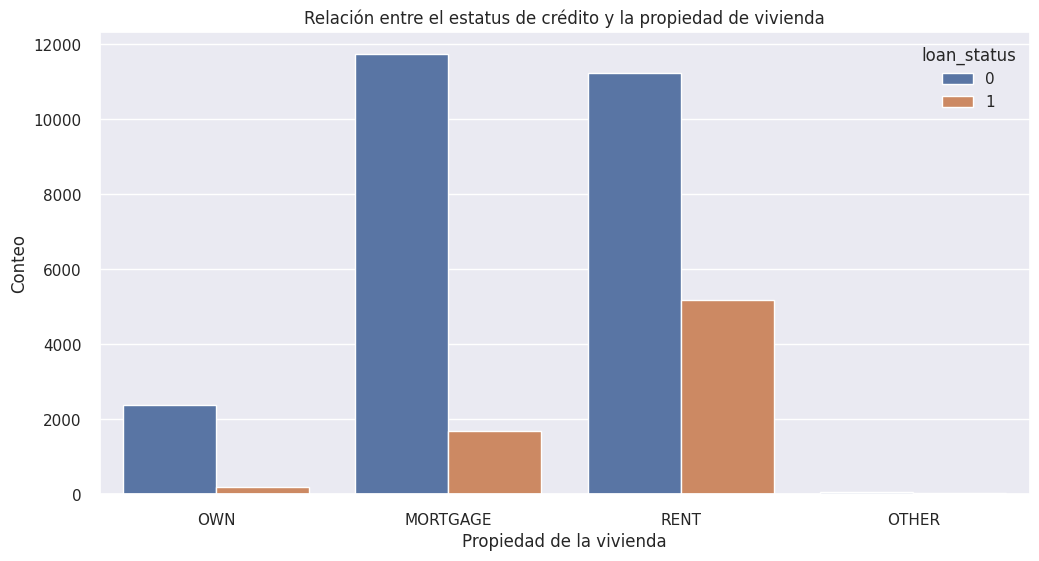

In [61]:
#Vemos la relacion entre el status de credito y la propiedad de sus viviendas (dueños, hipotecas, alquila y otros)
plt.figure(figsize=(12, 6))
sns.countplot(x='person_home_ownership', hue='loan_status', data=df)
plt.title('Relación entre el estatus de crédito y la propiedad de vivienda')
plt.xlabel('Propiedad de la vivienda')
plt.ylabel('Conteo')
plt.show()







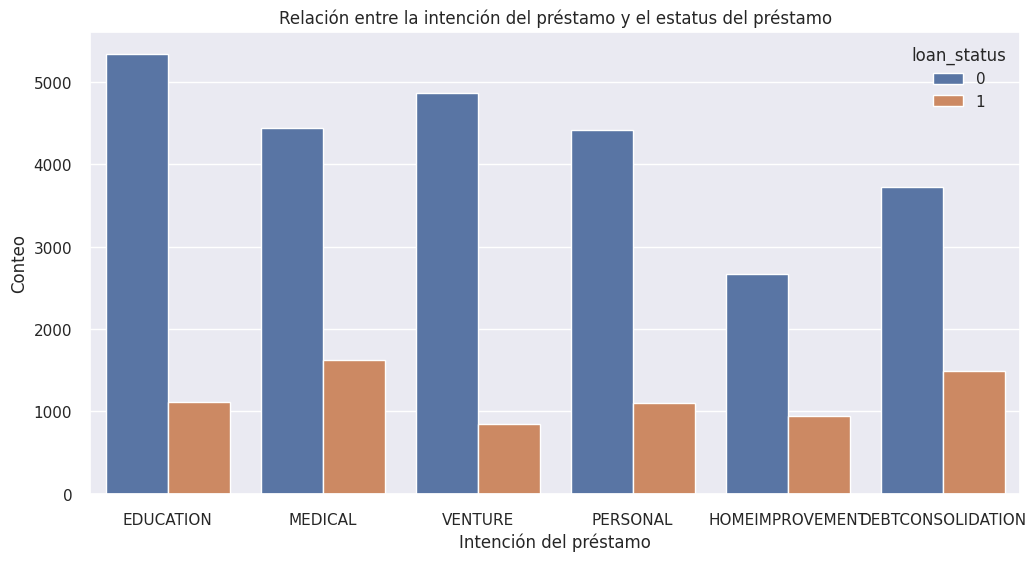

In [64]:
#Ahora vemos la relación del status de crédito respecto al destino gastado
plt.figure(figsize=(12, 6))
sns.countplot(x='loan_intent', hue='loan_status', data=df)
plt.title('Relación entre la intención del préstamo y el estatus del préstamo')
plt.xlabel('Intención del préstamo')
plt.ylabel('Conteo')
plt.show()


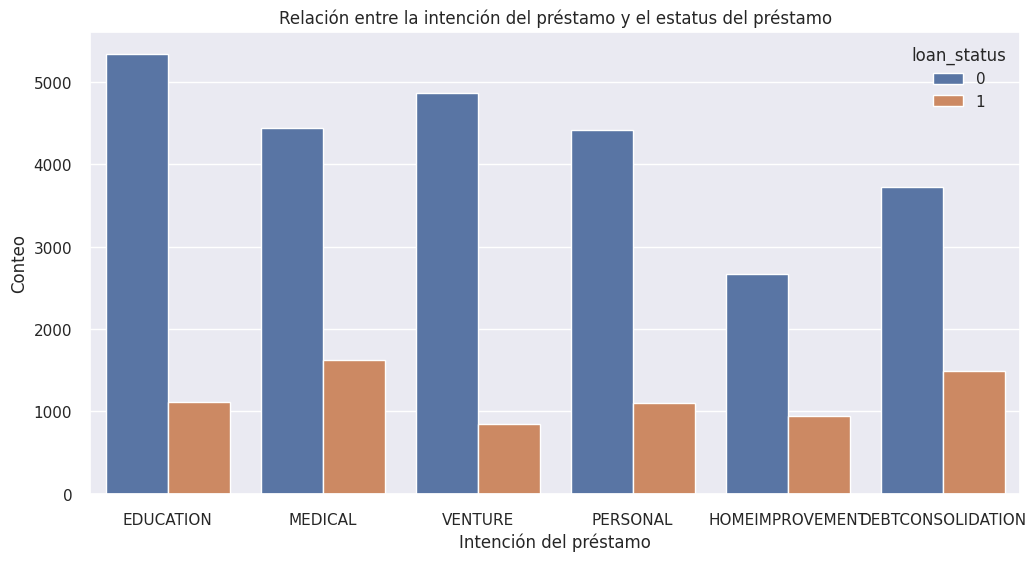

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.countplot(x='loan_intent', hue='loan_status', data=df)

plt.title('Relación entre la intención del préstamo y el estatus del préstamo')
plt.xlabel('Intención del préstamo')
plt.ylabel('Conteo')

plt.show()


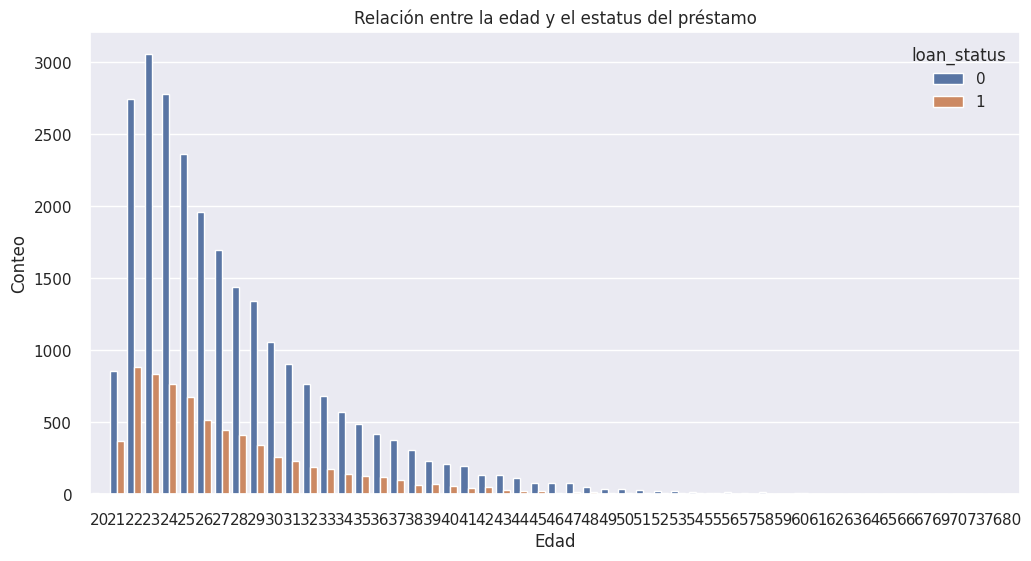

In [67]:
#Seguimos relacionando, y en este caso con la edad

plt.figure(figsize=(12, 6))
sns.countplot(x='person_age', hue='loan_status', data=df)
plt.title('Relación entre la edad y el estatus del préstamo')
plt.xlabel('Edad')
plt.ylabel('Conteo')
plt.show()


In [68]:
cross_col = pd.crosstab(index = df['loan_intent'], columns = df['loan_status'],
            normalize='index').round(4) * 100

cross_col

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,71.40,28.60
EDUCATION,82.77,17.23
HOMEIMPROVEMENT,73.88,26.12
MEDICAL,73.28,26.72
PERSONAL,80.10,19.90
VENTURE,85.17,14.83


**CONCLUSIONES EDA**

Tras los distintos tipos de análisis aplicados (Univariado, Bivariado y Multivariado) aprendidos durante el curso, llegamos a las siguientes conclusiones sobre el mercado de créditos actual:

- Aproximadamente, el 78% de las personas mantiene sus créditos al día y el 22% presenta algún tipo de deuda (default).

- El destino de los créditos es bastante parejo, pero se destacan principalmente educación (20%), cuestiones médicas (19%) y emprendimiento (17.5%).

- Las variables person_income, person_emp_length, y person_age tienen correlación negativa en el estado del crédito, lo que significa que mientras mayores sean los ingresos, la duración en el empleo y la edad de la persona, menos riesgoso será otorgarle un préstamo al cliente.

- Las variables loan_percent_income, loan_int_rate, y loan_amnt tienen correlación positiva en el estado del crédito, lo que significa que mientras mayores sean dichas variables, más posibilidades de caer en default tiene el crédito.

- La edad media de los clientes es 27-28 años, lo cual tiene lógica dado que el mayor destino de los préstamos es educación.

- El monto medio de los créditos es de 9587 USD.

- Considerando A,B como créditos de calidad alta, C,D calidad media y E,F,G calidad baja, tenemos 65% en calidad alta, 31% en calidad media y 4% en calidad baja.

- Más del 50% de nuestros clientes alquila su vivienda. Un 41% esta pagando una hipoteca, y solo un 8% es dueño pleno de su hogar.

- Separamos a los clientes en deudores y no deudores para tener una mayor claridad sobre como actúan cada uno.

- Los clientes deudores destinan sus préstamos principalmente a cuestiones médicas y a consolidación de deuda. Puede ser que sean clientes sin seguro médico y ante un accidente, piden dinero prestado.

- La mayor cantidad de clientes deudores son jóvenes. Tiene sentido dado que hay una tendencia donde a mayor edad, mayor ingreso anual.

- Aquellos clientes que alquilan su vivienda o pagan una hipoteca, tienen mayor presencia en la situación de clientes deudores. Tiene lógica dado que aquellas personas que son dueñas de su hogar, no tienen un gasto importante en alquiler o hipoteca.

- Los clientes propietarios de su hogar, son excelentes cumplidores de sus préstamos.

- Los clientes cuyo destino es emprendimiento presenta el % de default más bajo (solo 14% de aquellos que solicitan préstamo para emprender no cumple con sus créditos en tiempo y forma).

- Los clientes cuyo destino de préstamo es consolidación de deuda son los más propensos a ingresar en default (El 26% de los clientes que solicitan créditos para consolidación de deuda ingresa en default).


# **Preparación de Datos y Definición de Variable Target**

In [69]:
#Separamos el dataframe con las variables numericas y las categoricas
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')

In [70]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head(5)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0


In [71]:


#Se realizado un escalado para la normalización de los datos
scaler = MinMaxScaler()
df_dummy_sca = scaler.fit_transform(df_dummy)
df_dummy_sca = pd.DataFrame(df_dummy_sca)
df_dummy_sca.columns = df_dummy.columns
df_dummy_sca.head(5)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0.016667,0.007035,0.166667,0.014493,0.321348,0.0,0.120482,0.000000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.083333,0.007035,0.033333,0.144928,0.418539,1.0,0.686747,0.035714,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.050000,0.077261,0.133333,1.000000,0.551124,1.0,0.638554,0.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.066667,0.063317,0.266667,1.000000,0.497191,1.0,0.662651,0.071429,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.016667,0.007412,0.066667,0.057971,0.096629,1.0,0.301205,0.000000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
#Separamos los datos de entrada de la salida
X = df_dummy_sca.drop('loan_status', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.loan_status #Defino el Target

#**1° Modelo Arbol de Decisión**

Los arboles de decisión son representaciones gráficas de posibles soluciones a una decisión basadas en ciertas condiciones, es uno de los algoritmos de aprendizaje supervisado más utilizados en machine learning.
La comprensión de su funcionamiento suele ser simple y a la vez muy potente. Los árboles de decisión tienen un primer nodo llamado raíz (root) y luego se descomponen el resto de atributos de entrada en dos ramas, planteando una condición que puede ser cierta o falsa. Se bifurca cada nodo en 2 y vuelven a subdividirse hasta llegar a las hojas que son los nodos finales y que equivalen a respuestas a la solución: En nuestro dataset será, 0 o 1 (non default or default).

In [73]:
#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
#Creamos el modelo
tree = DecisionTreeClassifier(random_state = 42)

In [75]:
#Entrenamos el modelo
tree.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(random_state=42)

In [76]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [77]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 1.0
% de aciertos sobre el set de evaluación: 0.8853046594982079


In [80]:
#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred))

[[6979  647]
 [ 473 1666]]


Hay cuatro términos importantes en una matriz de confusión:

Verdaderos positivos (TP): estos son los casos en los que el "Sí" predicho en realidad pertenecía a la clase "Sí". 6979 datos

Negativos verdaderos (TN): Estos son los casos en los que el “No” predicho en realidad pertenecía a la clase “No”. 1656 datos

Falsos positivos (FP): estos son los casos en los que el "Sí" predicho en realidad pertenecía a la clase "No". Error tipo 1. 647 datos

Falsos negativos (FN): estos son los casos en los que el "No" predicho en realidad pertenecía a la clase "Sí". Error tipo 2. 473 datos

In [81]:
#Evaluación de Modelo

accuracy_tree = accuracy_score(y_test, y_test_pred).round(4)
precision_tree = precision_score(y_test, y_test_pred).round(4)
f1score_tree = f1_score(y_test, y_test_pred).round(4)
recall_tree = recall_score(y_test, y_test_pred).round(4)
print('Accuracy:', accuracy_tree)
print('Precision:', precision_tree)
print('F1 Score:', f1score_tree)
print('Recall:', recall_tree)

Accuracy: 0.8853
Precision: 0.7203
F1 Score: 0.7484
Recall: 0.7789


AUC for our classifier is: 0.847013648958369


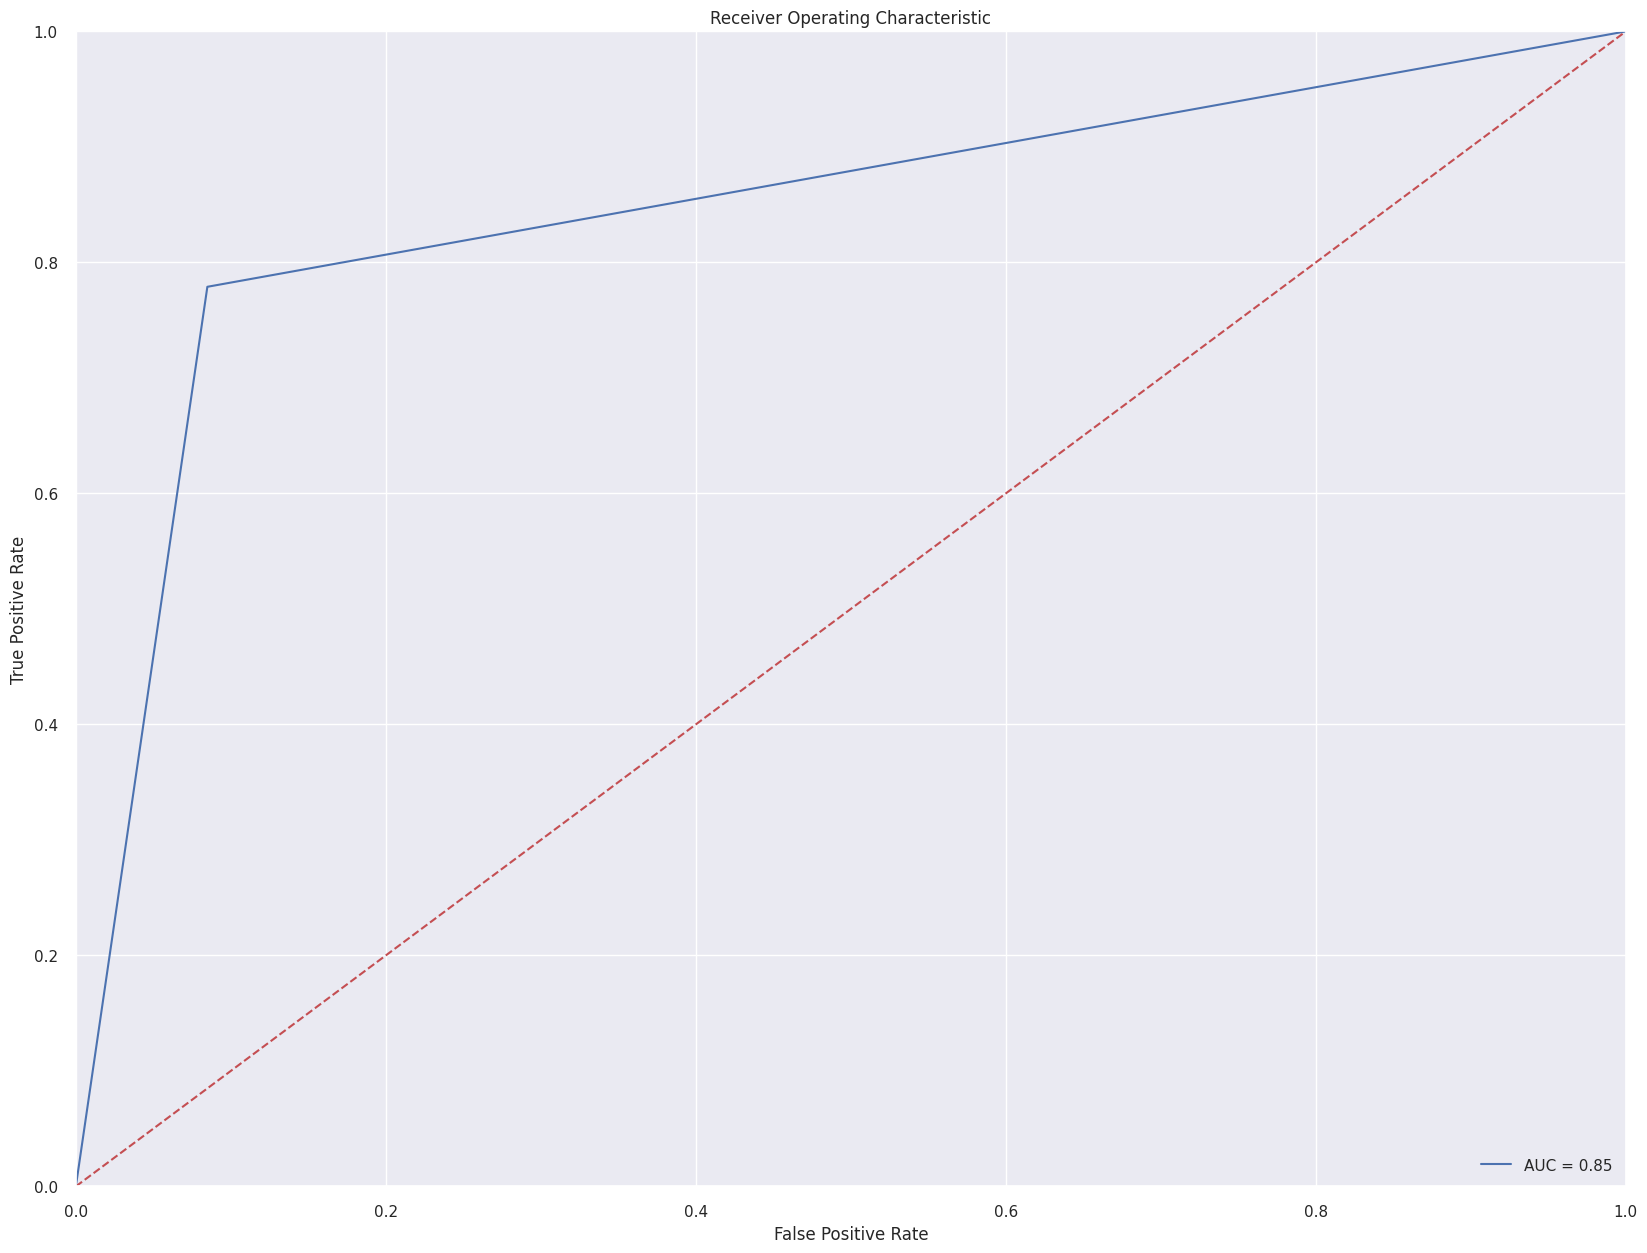

In [82]:
#Template CURVA - ROC

class_probabilities = tree.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
#Se buscan las variables que más influyen en el modelo
importances = tree.feature_importances_
nom_col_X = X.columns
importancias = pd.DataFrame(importances, index=nom_col_X, columns=["Importancia"])
importancias = importancias.sort_values(by="Importancia", ascending=False).head(5).T
importancias

,loan_percent_income,loan_int_rate,person_income,person_home_ownership_RENT,person_emp_length
Importancia,0.23712,0.161772,0.13884,0.134643,0.058313


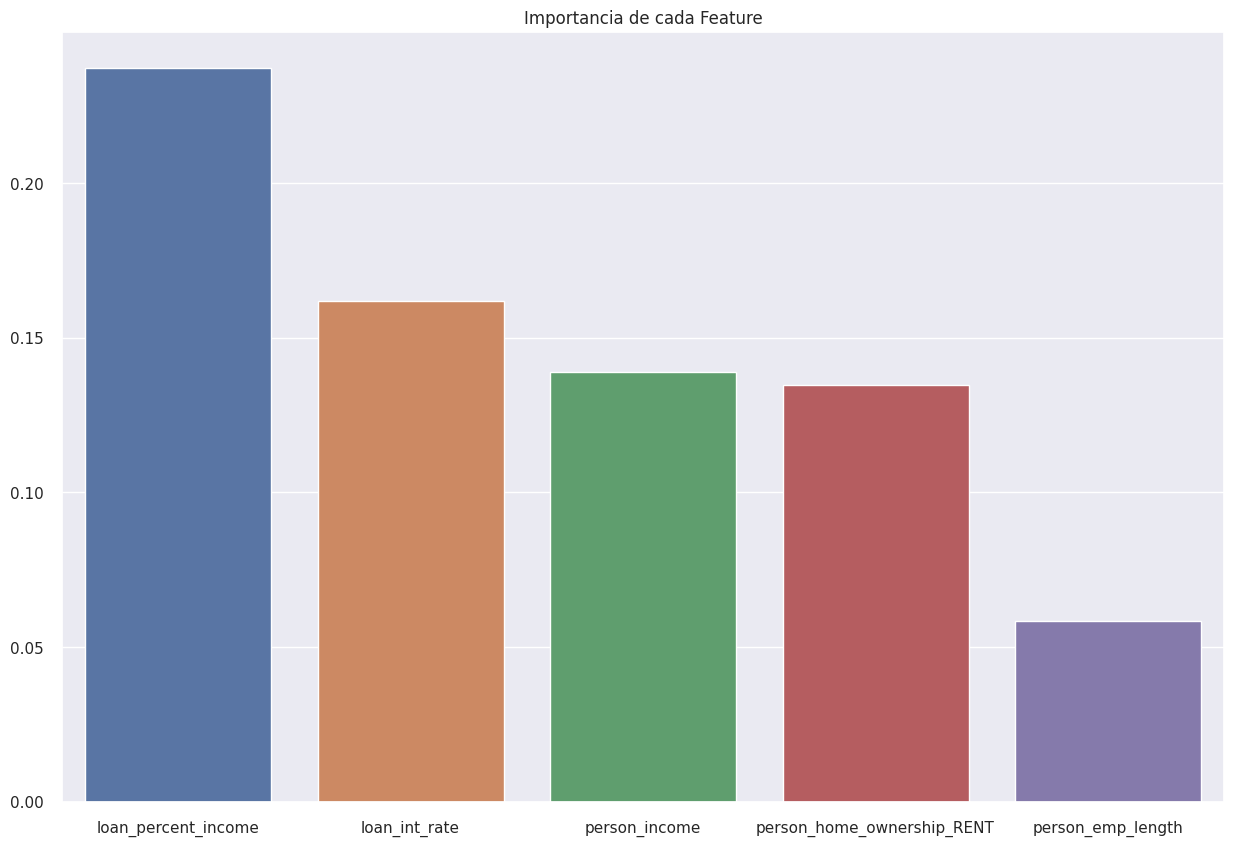

In [84]:
#Lo visualizamos
plt.figure(figsize=(15,10))
sns.barplot(data=importancias)
plt.title('Importancia de cada Feature')
plt.show()

In [85]:
#Probamos con una profundidad de 5

tree2 = DecisionTreeClassifier(max_depth = 5, random_state = 42) #Creamos el modelo

In [86]:
tree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [87]:
y_train_pred2 = tree2.predict(X_train) #Prediccion en Train
y_test_pred2 = tree2.predict(X_test) #Prediccion en Test

In [88]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred2)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred2)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9042749297752809
% de aciertos sobre el set de evaluación: 0.907731694828469


In [89]:
#Evaluación de Modelo

accuracy_tree2 = accuracy_score(y_test, y_test_pred2).round(4)
precision_tree2 = precision_score(y_test, y_test_pred2).round(4)
f1score_tree2 = f1_score(y_test, y_test_pred2).round(4)
recall_tree2 = recall_score(y_test, y_test_pred2).round(4)
print('Accuracy:', accuracy_tree2)
print('Precision:', precision_tree2)
print('F1 Score:', f1score_tree2)
print('Recall:', recall_tree2)


#Comprobamos que el modelo funciona mejor con un max depth de 5

Accuracy: 0.9077
Precision: 0.9806
F1 Score: 0.7371
Recall: 0.5905


[Text(0.6215277777777778, 0.9166666666666666, 'loan_percent_income <= 0.367\ngini = 0.341\nsamples = 22784\nvalue = [17817, 4967]'),
 Text(0.3541666666666667, 0.75, 'loan_int_rate <= 0.504\ngini = 0.259\nsamples = 20093\nvalue = [17015, 3078]'),
 Text(0.1527777777777778, 0.5833333333333334, 'person_income <= 0.02\ngini = 0.173\nsamples = 17281\nvalue = [15626, 1655]'),
 Text(0.08333333333333333, 0.4166666666666667, 'loan_percent_income <= 0.187\ngini = 0.42\nsamples = 414\nvalue = [124, 290]'),
 Text(0.05555555555555555, 0.25, 'person_home_ownership_RENT <= 0.5\ngini = 0.32\nsamples = 155\nvalue = [124, 31]'),
 Text(0.027777777777777776, 0.08333333333333333, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.377\nsamples = 123\nvalue = [92, 31]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 259\nvalue = [0, 259]'),
 Text(0.2222222222222222, 0.4166666666666667, 'loan_grade_D <= 0.5\ngini = 0.149\nsamples = 16867\nvalue = [1

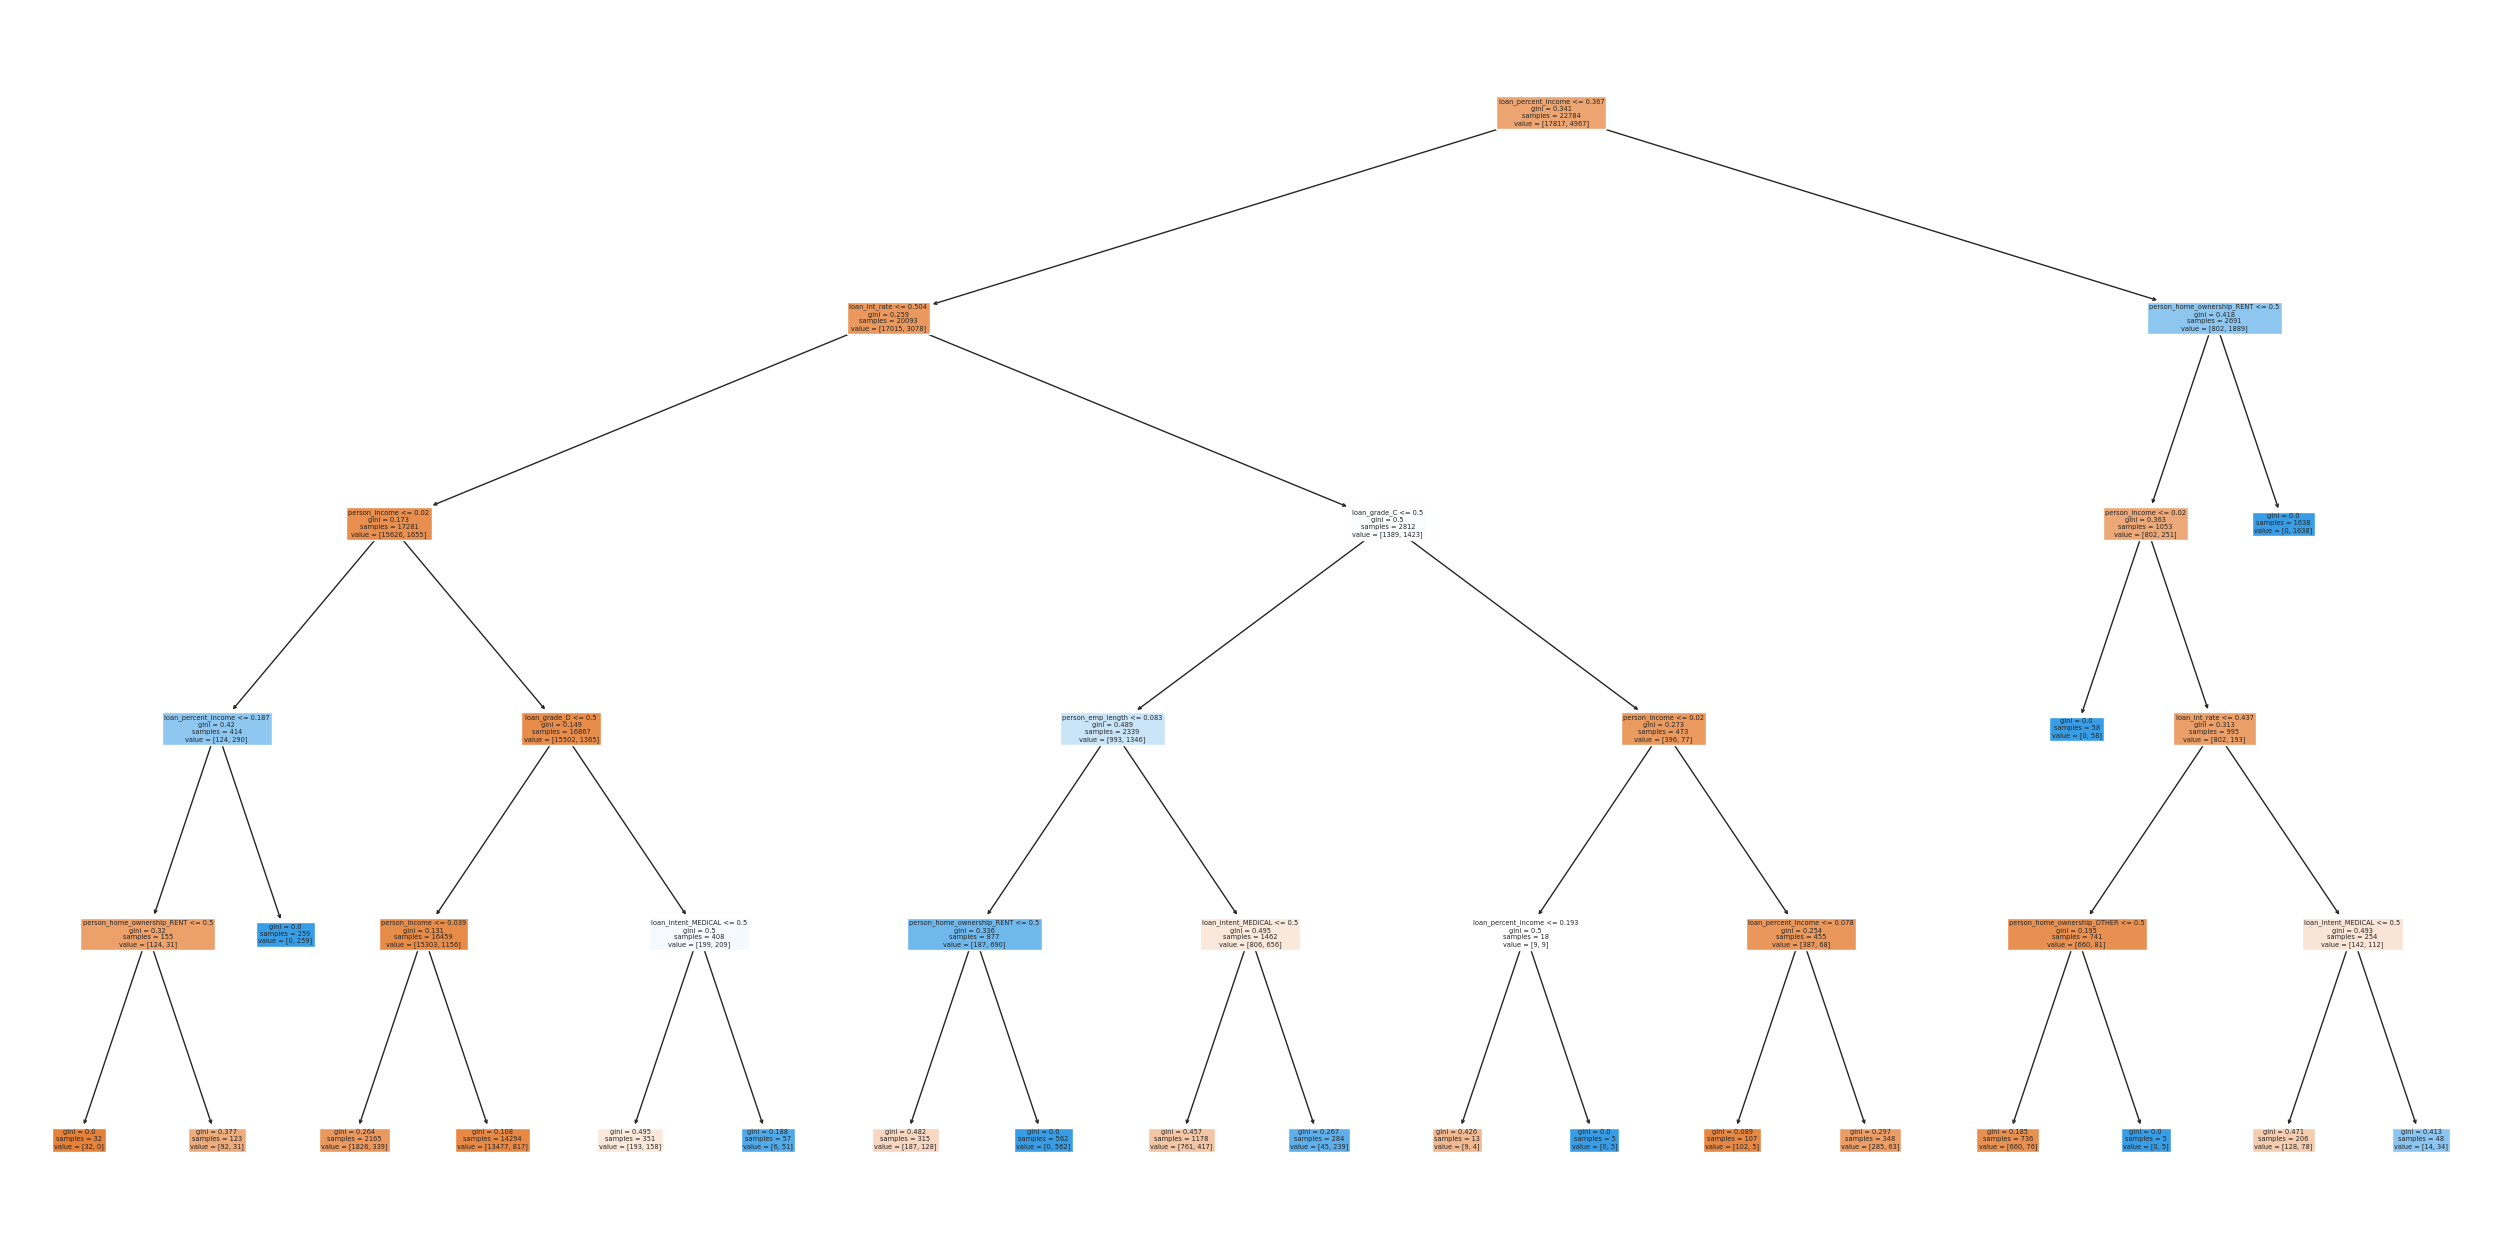

In [90]:
#Visualizamos el arbol de desicion
plt.figure(figsize=(32,16))
plot_tree(decision_tree=tree2, feature_names=X_train.columns, filled=True)

# **2° Modelo KNN Vecinos más cercanos**

K-Nearest-Neighbor es un algoritmo basado en instancia de tipo supervisado de Machine Learning. Sirve esencialmente para clasificar valores buscando los puntos de datos “más similares” (por cercanía) aprendidos en la etapa de entrenamiento y haciendo conjeturas de nuevos puntos basado en esa clasificación.

In [91]:
#definimos knn y la cantidad de "vecinos"

n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.89


In [92]:
from sklearn.metrics import classification_report
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[7393  233]
 [ 820 1319]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7626
           1       0.85      0.62      0.71      2139

    accuracy                           0.89      9765
   macro avg       0.88      0.79      0.82      9765
weighted avg       0.89      0.89      0.89      9765



In [93]:
#metricas del modelo

accuracy_knn = accuracy_score(y_test, pred).round(4)
precision_knn = precision_score(y_test, pred).round(4)
f1score_knn = f1_score(y_test, pred).round(4)
recall_knn = recall_score(y_test, pred).round(4)
print('Accuracy:', accuracy_knn)
print('Precision:', precision_knn)
print('F1 Score:', f1score_knn)
print('Recall:', recall_knn)

Accuracy: 0.8922
Precision: 0.8499
F1 Score: 0.7147
Recall: 0.6166


In [94]:
#En base a los features más importantes, armamos un predictor

X = df[["loan_percent_income", "loan_int_rate"]]
y = df["loan_status"]

escalador = MinMaxScaler()

X = escalador.fit_transform(X)
X

array([[0.12048193, 0.32134831],
       [0.68674699, 0.41853933],
       [0.63855422, 0.5511236 ],
       ...,
       [0.55421687, 0.31292135],
       [0.12048193, 0.34044944],
       [0.18072289, 0.25674157]])

In [95]:
clasificador = KNeighborsClassifier(n_neighbors=5)

clasificador.fit(X, y);

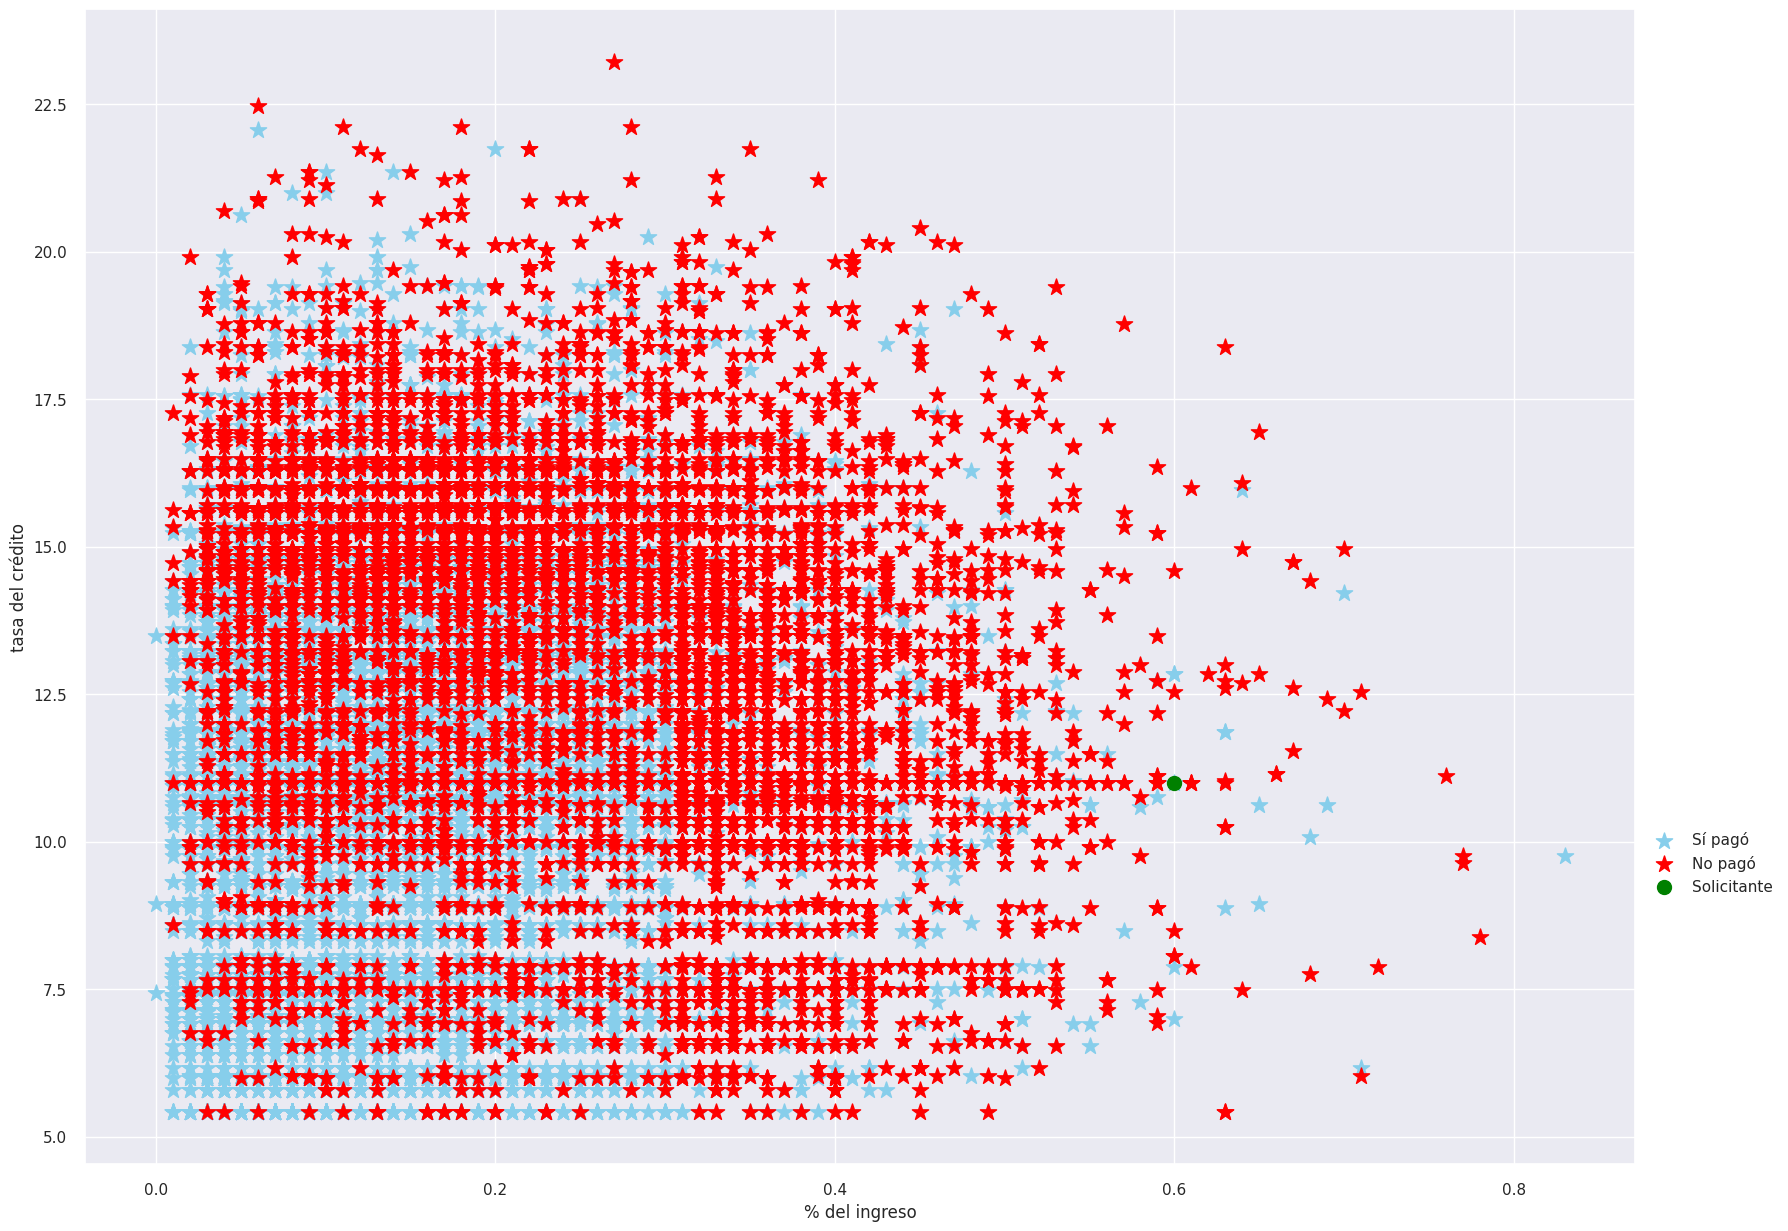

In [96]:
#Ejemplo de predicción, viene un cliente a solicitar un crédito, nos dice el monto a pedir, vemos sus ingresos, llegamos a que es el 60% de sus ingresos, le aplicamos la tasa vigente del 11% y nos da donde se ubicaría

loan_percent_income = 0.60
loan_int_rate = 11

#Escalar los datos del nuevo solicitante
solicitante = escalador.transform([[loan_percent_income, loan_int_rate]])

#Código para graficar
plt.scatter(no_debtor["loan_percent_income"], no_debtor["loan_int_rate"],
            marker="*", s=150, color="skyblue", label="Sí pagó")
plt.scatter(debtor["loan_percent_income"], debtor["loan_int_rate"],
            marker="*", s=150, color="red", label="No pagó")
plt.scatter(loan_percent_income, loan_int_rate, s=100, color="green", label="Solicitante")
plt.ylabel("tasa del crédito")
plt.xlabel("% del ingreso")

plt.legend(bbox_to_anchor=(1, 0.3)) #Se usa para que la caja de los labels se encuentre fuera del grafico
plt.show()

In [97]:
#Calcular clase y probabilidades
print("Clase:", clasificador.predict(solicitante))
print("Probabilidades por clase",
      clasificador.predict_proba(solicitante)*100)

Clase: [1]
Probabilidades por clase [[20. 80.]]


AUC for our classifier is: 0.8560070816515976


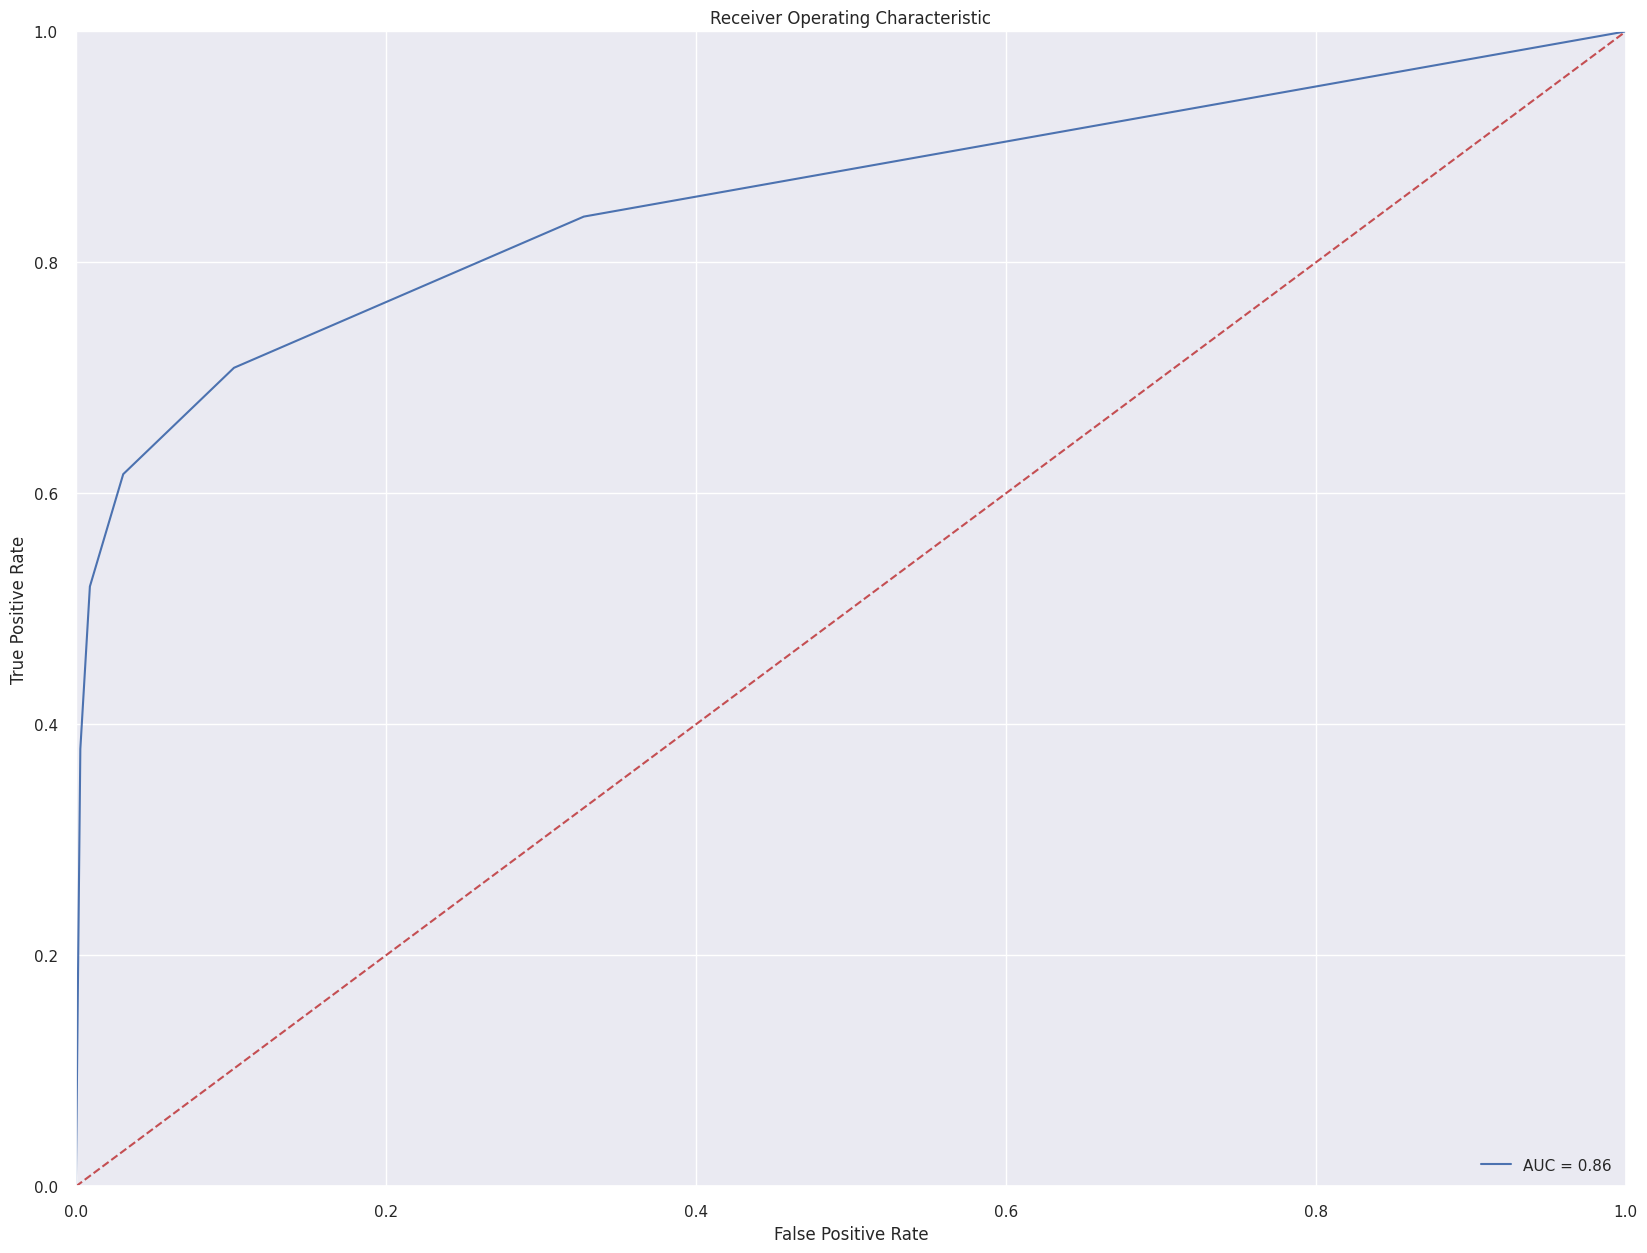

In [98]:
#Template CURVA - ROC

KNN_probabilities = knn.predict_proba(X_test)
preds = KNN_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **3° Modelo Random Forest**

Random Forest es un modelo de aprendizaje supervisado para clasificación. Es un tipo de Ensamble en Machine Learning en donde combinaremos diversos árboles  y la salida de cada uno se contará como “un voto” y la opción más votada será la respuesta del 'Bosque Aleatorio'.

Uno de los problemas que aparecía con la creación de un árbol de decisión es que si le damos la profundidad suficiente, el árbol tiende a “memorizar” las soluciones en vez de generalizar el aprendizaje. Es decir, a padecer de overfitting. La solución para evitar esto es la de crear muchos árboles y que trabajen en conjunto.

In [99]:
#Creamos un arbol de decisión sencillo y lo fiteamos
#Separamos los datos de entrada de la salida
X = df_dummy_sca.drop('loan_status', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.loan_status #Defino el Target
random_tree = RandomForestClassifier(random_state=42, max_depth=5)
random_tree.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [100]:
y_test_pred_random = random_tree.predict(X_test)

In [101]:
print('% de aciertos sobre el set de entrenamiento:',train_accuracy)

y_test_pred_random = random_tree.predict(X_test) #Prediccion en Test
test_accuracy = accuracy_score(y_test, y_test_pred_random)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9042749297752809
% de aciertos sobre el set de evaluación: 0.8985151049667178


In [102]:
#Evaluación de Modelo

accuracy_randomtree = accuracy_score(y_test, y_test_pred_random).round(4)
precision_randomtree = precision_score(y_test, y_test_pred_random).round(4)
f1score_randomtree = f1_score(y_test, y_test_pred_random).round(4)
recall_randomtree = recall_score(y_test, y_test_pred_random).round(4)
print('Accuracy:', accuracy_randomtree)
print('Precision:', precision_randomtree)
print('F1 Score:', f1score_randomtree)
print('Recall:', recall_randomtree)

Accuracy: 0.8985
Precision: 0.9541
F1 Score: 0.7088
Recall: 0.5638


AUC for our classifier is: 0.8990669699032873


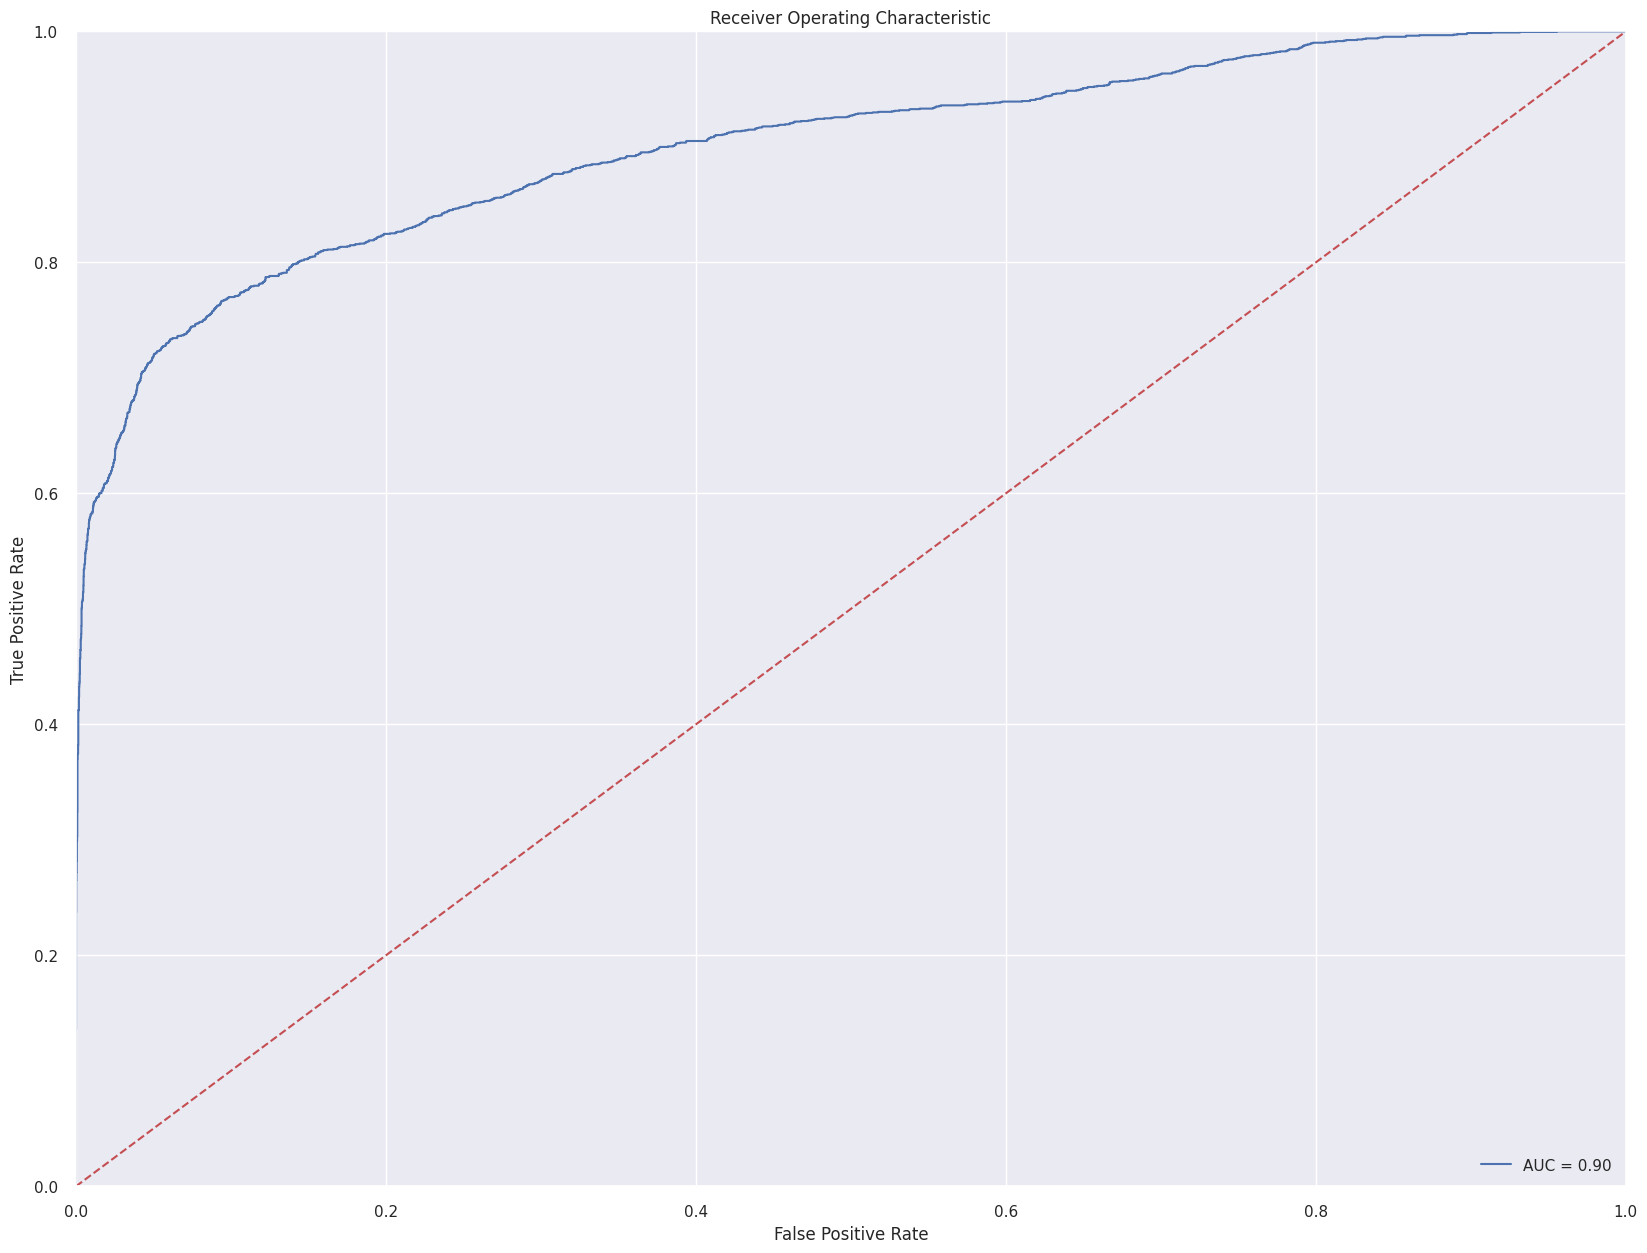

In [103]:
class_probabilities2 = random_tree.predict_proba(X_test)
random_tree_preds = class_probabilities2[:, 1]

fpr, tpr, threshold = roc_curve(y_test, random_tree_preds)
roc_auc2 = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc2}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **4° Modelo Regresión Logística**

A pesar de su nombre, no es un algoritmo de regresión en el que se prediga un valor continuo, sino que es un método para problemas de clasificación binaria. El método de regresión logística es un método estadístico que se usa para resolver problemas de clasificación binaria, donde el resultado solo puede ser de naturaleza dicotómica, o sea, solo puede tomar dos valores posibles. Por ejemplo, se puede utilizar para detectar la probabilidad de que ocurra un evento.

En nuestro dataset, el evento será si el crédito caerá en default o no.

In [104]:
# Obtenemos las variables categoricas
cat_cols = pd.DataFrame(df[df.select_dtypes(include=['object']).columns])
cat_cols.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

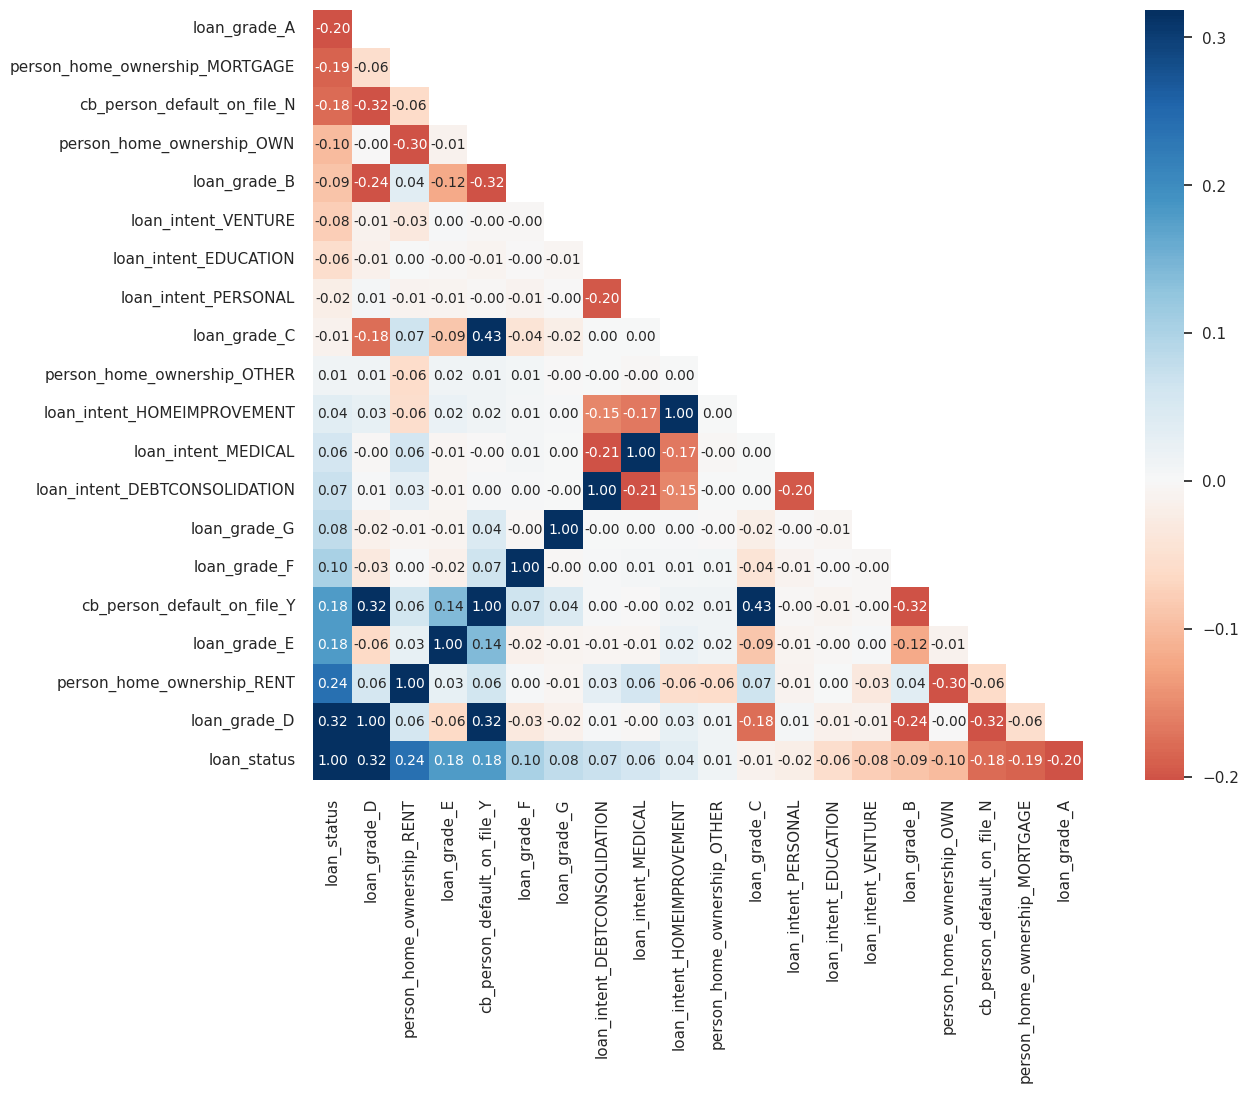

In [105]:
# Codificamos las variables categoricas con el metodo One Hot Encoding
encoded_cat_cols = pd.get_dummies(cat_cols)
cat_cols_corr = pd.concat([encoded_cat_cols, df['loan_status']], axis=1)
corr = cat_cols_corr.corr().sort_values('loan_status', axis=1, ascending=False)
corr = corr.sort_values('loan_status', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.loan_status.min(),
                     vmax=corr.drop(['loan_status'], axis=0).loan_status.max(),
                     square=True, annot=True, fmt='.2f',
                     center=0, cmap='RdBu',annot_kws={"size": 10})

In [106]:
# Obtenemos las variables numericas limpias
cleaned_num_cols = pd.DataFrame(df[df.select_dtypes(include=['float', 'int']).columns])

In [107]:
# Concatenamos las variables numericas con las categoricas One Hot Encoding
cleaned_credit_df = pd.concat([cleaned_num_cols, encoded_cat_cols], axis=1)
cleaned_credit_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


In [108]:
# Chequeamos el tamaño del dataset limpio
print ('The cleaned dataset has {} rows and {} columns'.format(cleaned_credit_df.shape[0],
                                                               cleaned_credit_df.shape[1]))
print ('The cleaned dataset has {} numerical features and {} categorical features'
       .format(len(cleaned_num_cols.columns)-1, len(encoded_cat_cols.columns)))

The cleaned dataset has 32549 rows and 27 columns
The cleaned dataset has 7 numerical features and 19 categorical features


In [109]:
#Entrenamos nuevamente el modelo para evitar interferencia de los modelos anteriores
from sklearn.model_selection import train_test_split
from sklearn import model_selection,linear_model, metrics

label = cleaned_credit_df['loan_status'] # labels
features = cleaned_credit_df.drop('loan_status',axis=1) # features
x_train, x_test, y_train, y_test = model_selection.train_test_split(features, label, random_state=42, test_size=.30)
print('The train dataset has {} data\nThe test dataset has {} data'.
      format(x_train.shape[0], x_test.shape[0]))

The train dataset has 22784 data
The test dataset has 9765 data


In [110]:
modelo_LR = LogisticRegression(random_state=42)
modelo_LR.fit(x_train, y_train)
score = modelo_LR.score(x_train, y_train)
print('Accuracy train data: %.2f%%' % (score * 100))

Accuracy train data: 80.59%


In [111]:
#Evaluamos el modelo
predict = modelo_LR.predict(x_test)
accuracy_regresion = accuracy_score(y_test, predict)
precision_regresion = precision_score(y_test, predict)
recall_regresion = recall_score(y_test, predict)
f1score_regresion = f1_score(y_test, predict)

print('Accuracy predict: %.2f%%' % (accuracy_regresion * 100.0))
print('Precision: %.2f%%' % (precision_regresion * 100.0))
print('Recall: %.2f%%' % (recall_regresion * 100.0))
print('F1_score: %.2f%%' % (f1score_regresion * 100.0))

Accuracy predict: 80.36%
Precision: 72.69%
Recall: 16.55%
F1_score: 26.96%


AUC for our classifier is: 0.7571051618763938


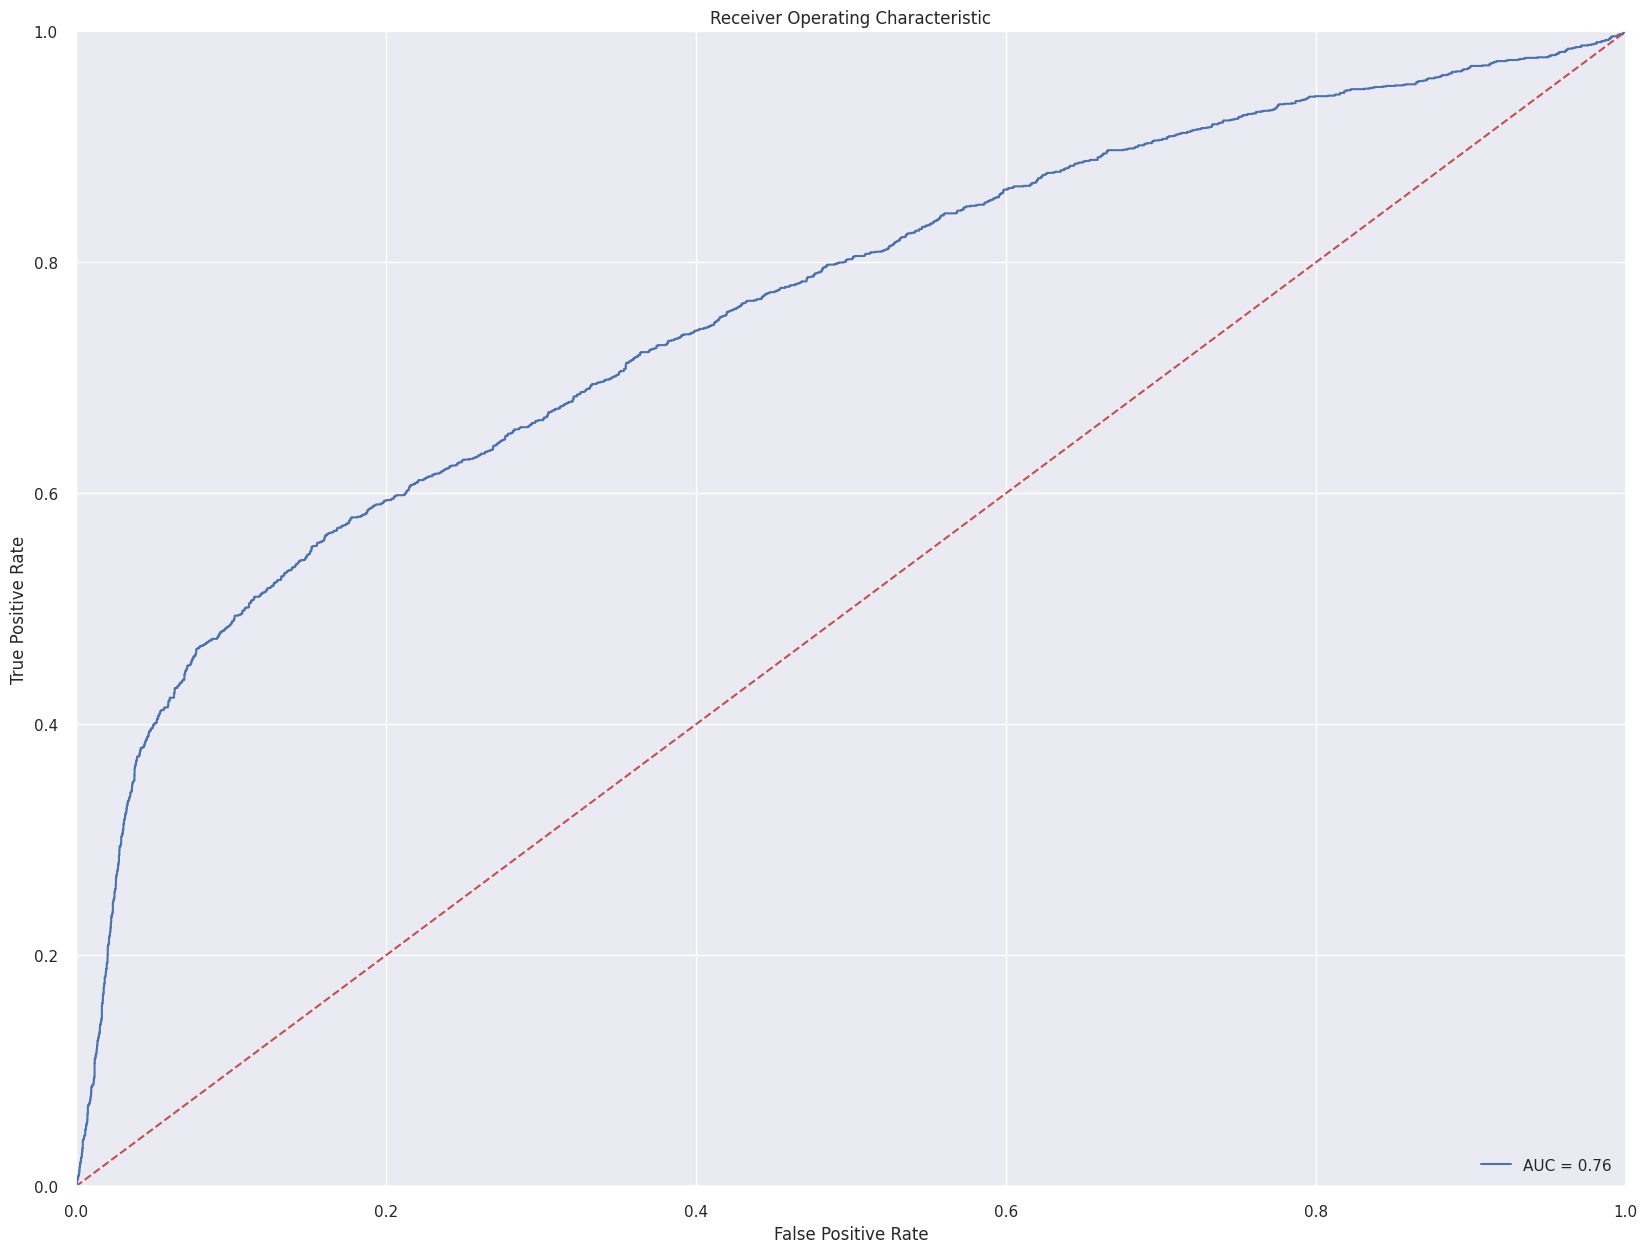

In [112]:
#Template CURVA - ROC

LR_probabilities = modelo_LR.predict_proba(x_test)
preds = LR_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Comparación de Métricas de los 4 Modelos Utilizados**

In [113]:
#Creación de tabla que muestra la comparativa entre las métricas de cada modelo utilizado
metrics = pd.DataFrame(index=['accuracy', 'precision','f1 score', 'recall'],
                       columns=['Arbol de Decision','KNN Vecinos','Random Forest',
                                'Regresion Logistica'])
metrics['Arbol de Decision'] = [accuracy_tree2,precision_tree2,f1score_tree2,recall_tree2]
metrics['KNN Vecinos'] = [accuracy_knn,precision_knn,f1score_knn,recall_knn]
metrics['Random Forest'] = [accuracy_randomtree,precision_randomtree,f1score_randomtree,recall_randomtree]
metrics['Regresion Logistica'] = [accuracy_regresion,precision_regresion,f1score_regresion,recall_regresion]
pd.set_option('display.float_format', lambda x: '%0.5f' % x)
metrics = metrics.T
metrics

,accuracy,precision,f1 score,recall
Arbol de Decision,0.90770,0.98060,0.73710,0.59050
KNN Vecinos,0.89220,0.84990,0.71470,0.61660
Random Forest,0.89850,0.95410,0.70880,0.56380
Regresion Logistica,0.80358,0.72690,0.26961,0.16550


Conclusiones Parciales: Basando en los resultados, el algoritmo con mejor cantidad de aciertos es el árbol de decisión clásico (con profundidad de 5 niveles). Observamos como KNN vecinos más cercanos y random forest tienen un accuracy similar, por lo que son buenas alternativas. Regresión logística presenta un accuracy de 80%, bastante por debajo de los otros tres modelos. En tanto que en Precisión, qué es el número de elementos identificados correctamente como positivo de un total de elementos identificados como positivos. Árbol de Decisión y Random Forest tienen las mejores métricas.

Una vez asegurados que el mejor algoritmo para nuestro modelo sería el de Árbol de Decisión se proseguirá con la aplicación de algoritmos de optimización dentro del modelo.


# **Mejora a los Modelos (KFOLD - optimizacion de hiper parametros con random grid search)**

## KFOLD

Este proceso se repite k veces utilizando un grupo distinto como validación en cada iteración. Finalmente obtenemos criterios de evaluación donde tomamos un promedio.

In [114]:
#Entrenamos el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kf = KFold(n_splits=5)

clf = DecisionTreeClassifier(max_depth = 5, random_state=42)

clf.fit(X_train, y_train)

score = clf.score(X_train,y_train)

print("Metrica del modelo", score)

scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="accuracy")

print("Metricas cross_validation", scores)

print("Media de cross_validation", scores.mean())

preds_kf = clf.predict(X_test)

score_pred = accuracy_score(y_test, preds_kf)

print("Metrica en Test", score_pred)

Metrica del modelo 0.9042749297752809
Metricas cross_validation [0.90542023 0.90037305 0.8975203  0.89817863 0.91022827]
Media de cross_validation 0.9023440960399567
Metrica en Test 0.907731694828469


In [115]:
#Evaluamos el modelo
accuracy_kfold = accuracy_score(y_test, preds_kf).round(4)
precision_kfold = precision_score(y_test, preds_kf).round(4)
f1score_kfold = f1_score(y_test, preds_kf).round(4)
recall_kfold = recall_score(y_test, preds_kf).round(4)
print('Accuracy:', accuracy_kfold)
print('Precision:', precision_kfold)
print('F1 Score:', f1score_kfold)
print('Recall:', recall_kfold)

Accuracy: 0.9077
Precision: 0.9806
F1 Score: 0.7371
Recall: 0.5905


La aplicación de KFOLD nos otorga ventajas respecto a los modelos previos ya que todos sus índices son superiores.

## Random Grid Search

El método más común de ajuste de hiperparámetros es grid search. Este método crea una cuadrícula (grid) de ajuste con combinaciones únicas de valores de hiperparámetros y utiliza cross validation (validación cruzada) para evaluar su rendimiento. El objetivo del ajuste de hiperparámetros es encontrar la combinación óptima de valores para maximizar el rendimiento del modelo. El random grid search prueba combinaciones de valores al azar que se le proporcione en el grid de parámetros.

In [116]:
import scipy as sp
from sklearn.model_selection import RandomizedSearchCV
X = df_dummy_sca.drop('loan_status', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.loan_status #Defino el Target
random_tree2 = RandomForestClassifier(random_state=42, max_depth=5)
random_tree2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [117]:
# Grilla para Random Search
param_dist = {
    'n_estimators': [1, 100],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

#Aplicamos la grilla al modelo
model_randomGS = RandomizedSearchCV(random_tree2, param_dist,n_iter=100, random_state=42, cv=5)

In [118]:
model_randomGS.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=5,
                                                    random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'n_estimators': [1, 100]},
                   random_state=42)

In [119]:
print("Mejores parametros: "+str(model_randomGS.best_params_))
print("Mejor Score: "+str(model_randomGS.best_score_)+'\n')

Mejores parametros: {'n_estimators': 100, 'max_depth': 8, 'criterion': 'entropy'}
Mejor Score: 0.9183200964545664



In [120]:
#Prediccion
predictionGS = model_randomGS.predict(X_test)

In [121]:
test_accuracy = accuracy_score(y_test, predictionGS)
print('Exactitud:',test_accuracy)

Exactitud: 0.9208397337429596


In [122]:
# Matriz de Confusion
cm = confusion_matrix(y_test,predictionGS)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[7550   76]
 [ 697 1442]]


In [123]:
#Evaluación de Modelo

accuracy_randomtreeGS = accuracy_score(y_test, predictionGS).round(4)
precision_randomtreeGS = precision_score(y_test, predictionGS).round(4)
f1score_randomtreeGS = f1_score(y_test, predictionGS).round(4)
recall_randomtreeGS = recall_score(y_test, predictionGS).round(4)
print('Accuracy:', accuracy_randomtreeGS)
print('Precision:', precision_randomtreeGS)
print('F1 Score:', f1score_randomtreeGS)
print('Recall:', recall_randomtreeGS)

Accuracy: 0.9208
Precision: 0.9499
F1 Score: 0.7886
Recall: 0.6741


Este método nos aporta una mejora significativa respecto a lo obtenido previamente, aumentando todos los indicadores. Un accuracy del 92,08% es un buen candidato. La única desventaja es que es un poco más lento que los métodos evaluados anteriormente, ya que la celda 91 demoró más de 1 minuto en correr.

# **Modelos de Ensamble/Boosting**

## XGBoost

Implementa modelos de predicciones débiles, con el objetivo de que secuencialmente cada modelo débil le permita ir ganando mas poder predictivo hasta llegar a un modelo más robusto con mayor estabilidad en sus resultados.

In [124]:
#Separamos los datos de entrada de la salida
X = df_dummy_sca.drop('loan_status', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.loan_status #Defino el Target

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [126]:
XGBoost = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

In [127]:
XGBoost.fit(x_train, y_train)
preds = XGBoost.predict(x_test)
preds_train = XGBoost.predict(x_train)
preds_proba = XGBoost.predict_proba(x_test)
print('XGBoost', '\n',classification_report(y_test, preds))

XGBoost 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      7626
           1       0.94      0.75      0.84      2139

    accuracy                           0.94      9765
   macro avg       0.94      0.87      0.90      9765
weighted avg       0.94      0.94      0.93      9765



In [128]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, preds_train)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, preds)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9586990870786517
% de aciertos sobre el set de evaluación: 0.9353814644137225


In [129]:
#Evaluación de Modelo

accuracy_xgb = accuracy_score(y_test, preds).round(4)
precision_xgb = precision_score(y_test, preds).round(4)
f1score_xgb = f1_score(y_test, preds).round(4)
recall_xgb = recall_score(y_test, preds).round(4)
print('Accuracy:', accuracy_xgb)
print('Precision:', precision_xgb)
print('F1 Score:', f1score_xgb)
print('Recall:', recall_xgb)

Accuracy: 0.9354
Precision: 0.9415
F1 Score: 0.836
Recall: 0.7518


## Adaboost

Trabaja sobre una tasa de error, donde el primer modelo es un aprendiz débil, el segundo modelo será menos débil y así sucesivamente, hasta llegar a una tasa de error que sea próxima a 0.

In [130]:
X = df_dummy_sca.drop('loan_status', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.loan_status #Defino el Target


ada = AdaBoostClassifier(n_estimators=50,learning_rate=1)
ada.fit(X_train, y_train)
ada.score(X_test, y_test)

0.8857142857142857

In [131]:
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = ada.fit(X_train, y_train)

In [132]:
y_test_pred_ada = ada.predict(X_test)

In [133]:
#Evaluación de Modelo

accuracy_ada = accuracy_score(y_test, y_test_pred_ada).round(4)
precision_ada = precision_score(y_test, y_test_pred_ada).round(4)
f1score_ada = f1_score(y_test, y_test_pred_ada).round(4)
recall_ada = recall_score(y_test, y_test_pred_ada).round(4)
print('Accuracy:', accuracy_ada )
print('Precision:', precision_ada)
print('F1 Score:', f1score_ada)
print('Recall:', recall_ada)

Accuracy: 0.8857
Precision: 0.7908
F1 Score: 0.7137
Recall: 0.6503


## Gradient Boosting

Se basa en un principio de intuición. Implementa concepto de aleatoriedad. En la iteración 1 entrena, en la iteración 2 adopta ese principio de intuición/aleatoriedad y luego en la iteración 3 lo hara nuevamente y asi sucesivamente. Ese factor permitirá darle al modelo una minimizacion del error de predicción general. Ese factor de aleatoriedad que se va agregando a las iteraciones, es lo que se conoce como Gradiente.

In [134]:
X = df_dummy_sca.drop('loan_status', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.loan_status #Defino el Target


gbrt = GradientBoostingClassifier(random_state = 42)
gbrt.fit(X_train, y_train)
gbrt.score(X_test, y_test)

0.9224782386072709

In [135]:
y_test_pred_gbrt = gbrt.predict(X_test)

In [136]:
accuracy_gbrt = accuracy_score(y_test, y_test_pred_gbrt).round(4)
precision_gbrt = precision_score(y_test, y_test_pred_gbrt).round(4)
f1score_gbrt = f1_score(y_test, y_test_pred_gbrt).round(4)
recall_gbrt = recall_score(y_test, y_test_pred_gbrt).round(4)
print('Accuracy:', accuracy_gbrt)
print('Precision:', precision_gbrt)
print('F1 Score:', f1score_gbrt)
print('Recall:', recall_gbrt)

Accuracy: 0.9225
Precision: 0.9271
F1 Score: 0.7985
Recall: 0.7013


In [138]:
#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred_gbrt))

[[7508  118]
 [ 639 1500]]


# **Comparación de Todos los Modelos**

In [139]:
#Creación de tabla que muestra la comparativa entre las métricas de cada modelo utilizado
metrics2 = pd.DataFrame(index=['accuracy', 'precision','f1 score', 'recall'],
                       columns=['Arbol de Decision','KNN Vecinos','Random Forest',
                                'Regresion Logistica','KFOLD','Random Grid Search', 'XGBoost', 'Adaboost', 'Gradient Boosting'])
metrics2['Arbol de Decision'] = [accuracy_tree2,precision_tree2,f1score_tree2,recall_tree2]
metrics2['KNN Vecinos'] = [accuracy_knn,precision_knn,f1score_knn,recall_knn]
metrics2['Random Forest'] = [accuracy_randomtree,precision_randomtree,f1score_randomtree,recall_randomtree]
metrics2['Regresion Logistica'] = [accuracy_regresion,precision_regresion,f1score_regresion,recall_regresion]
metrics2['KFOLD'] = [accuracy_kfold,precision_kfold,f1score_kfold,recall_kfold]
metrics2['Random Grid Search'] = [accuracy_randomtreeGS,precision_randomtreeGS,f1score_randomtreeGS,recall_randomtreeGS]
metrics2['XGBoost'] = [accuracy_xgb,precision_xgb,f1score_xgb,recall_xgb]
metrics2['Adaboost'] = [accuracy_ada,precision_ada,f1score_ada,recall_ada]
metrics2['Gradient Boosting'] = [accuracy_gbrt,precision_gbrt,f1score_gbrt,recall_gbrt]
pd.set_option('display.float_format', lambda x: '%0.5f' % x)
metrics2 = metrics2.T
metrics2

,accuracy,precision,f1 score,recall
Arbol de Decision,0.90770,0.98060,0.73710,0.59050
KNN Vecinos,0.89220,0.84990,0.71470,0.61660
Random Forest,0.89850,0.95410,0.70880,0.56380
Regresion Logistica,0.80358,0.72690,0.26961,0.16550
KFOLD,0.90770,0.98060,0.73710,0.59050
Random Grid Search,0.92080,0.94990,0.78860,0.67410
XGBoost,0.93540,0.94150,0.83600,0.75180
Adaboost,0.88570,0.79080,0.71370,0.65030
Gradient Boosting,0.92250,0.92710,0.79850,0.70130


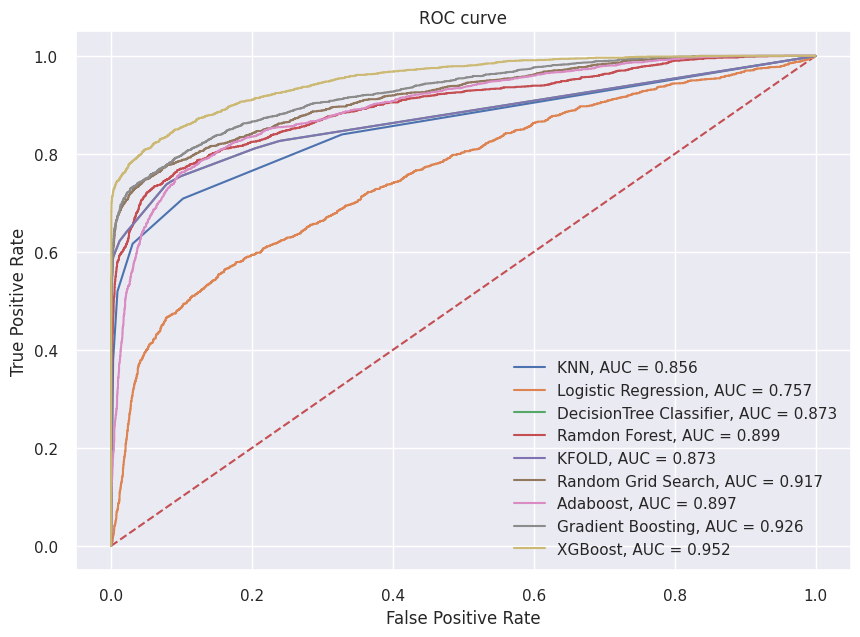

In [140]:
#ROC AUC
fig = plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1],'r--')

#KNN
preds_proba_knn = knn.predict_proba(X_test)
probsknn = preds_proba_knn[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsknn)
aucknn = roc_auc_score(y_test, probsknn)
plt.plot(fpr, tpr, label=f'KNN, AUC = {str(round(aucknn,3))}')

#Logistic Regression
LR_probabilities = modelo_LR.predict_proba(x_test)
probslg = LR_probabilities[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')

#DecisionTree Classifier
class_probabilities2 = tree2.predict_proba(X_test)
probsD_tree = class_probabilities2[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsD_tree)
auclg = roc_auc_score(y_test, probsD_tree)
plt.plot(fpr, tpr, label=f'DecisionTree Classifier, AUC = {str(round(auclg,3))}')

#Ramdon Forest
class_probabilities2 = random_tree.predict_proba(X_test)
random_tree_preds = class_probabilities2[:, 1]
fpr, tpr, thresh = roc_curve(y_test, random_tree_preds)
auclg = roc_auc_score(y_test, random_tree_preds)
plt.plot(fpr, tpr, label=f'Ramdon Forest, AUC = {str(round(auclg,3))}')

#KFOLD
preds_kf = clf.predict_proba(X_test)
kf_p = preds_kf[:, 1]
fpr, tpr, thresh = roc_curve(y_test, kf_p)
auclg = roc_auc_score(y_test, kf_p)
plt.plot(fpr, tpr, label=f'KFOLD, AUC = {str(round(auclg,3))}')

#Random Grid Search
predictionGS = model_randomGS.predict_proba(X_test)
random_grid_p = predictionGS[:,1]
fpr, tpr, thresh = roc_curve(y_test, random_grid_p)
auclg = roc_auc_score(y_test, random_grid_p)
plt.plot(fpr, tpr, label=f'Random Grid Search, AUC = {str(round(auclg,3))}')

# Adaboost
y_test_pred_ada = ada.predict_proba(X_test)
ada_p = y_test_pred_ada[:,1]
fpr, tpr, thresh = roc_curve(y_test, ada_p)
auclg = roc_auc_score(y_test, ada_p)
plt.plot(fpr, tpr, label=f'Adaboost, AUC = {str(round(auclg,3))}')

#Gradient Boosting
y_test_pred_gbrt = gbrt.predict_proba(X_test)
gradient_p = y_test_pred_gbrt[:,1]
fpr, tpr, thresh = roc_curve(y_test, gradient_p)
auclg = roc_auc_score(y_test, gradient_p)
plt.plot(fpr, tpr, label=f'Gradient Boosting, AUC = {str(round(auclg,3))}')

#XGBoost
preds_proba_xgb = XGBoost.predict_proba(x_test)
probsxgb = preds_proba_xgb[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsxgb)
aucxgb = roc_auc_score(y_test, probsxgb)
plt.plot(fpr, tpr, label=f'XGBoost, AUC = {str(round(aucxgb,3))}')
plt.ylabel("True Positive Rate", fontsize=12)
plt.xlabel("False Positive Rate", fontsize=12)
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 16
plt.legend()
plt.show()


#Conclusiones Finales

Antes que nada, veamos la definición de las métricas principales que estamos usando para comparar:

* Accuracy (exactitud): mide el porcentaje de casos que
el modelo ha acertado. Es la medida más directa de la calidad de los clasificadores, los valores se encuentran entre 0 y 1, y mientras más alto mejor. Es una métrica de la cual no se debe confiar plenamente, ya que puede ocasionar problemas si las clases de variables de destino en los datos no están balanceadas.

* Precision (Precisión): sirve para medir la calidad del modelo de machine learning en tareas de clasificación. Identifica qué porcentaje de valores que se han clasificado como positivos son realmente positivos.

* Recall (Exhaustividad): nos va a informar sobre la cantidad que el modelo de machine learning es capaz de identificar.

* F1 score (puntaje F1): se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.




#Elección del modelo ganador


In [141]:
#Ante los datos comparados, tenemos 3 candidatos con las mejores métricas:
media_rg=(accuracy_randomtreeGS + precision_randomtreeGS + f1score_randomtreeGS + recall_randomtreeGS)/4
media_xg=(accuracy_xgb + precision_xgb + f1score_xgb + recall_xgb)/4
media_gb=(accuracy_gbrt + precision_gbrt + f1score_gbrt + recall_gbrt)/4
metrics2 = pd.DataFrame(index=['accuracy', 'precision','f1 score', 'recall','mean'],
                       columns=['Random Grid Search', 'XGBoost', 'Gradient Boosting'])
metrics2['Random Grid Search'] = [accuracy_randomtreeGS,precision_randomtreeGS,f1score_randomtreeGS,recall_randomtreeGS,media_rg]
metrics2['XGBoost'] = [accuracy_xgb,precision_xgb,f1score_xgb,recall_xgb,media_xg]
metrics2['Gradient Boosting'] = [accuracy_gbrt,precision_gbrt,f1score_gbrt,recall_gbrt,media_gb]
pd.set_option('display.float_format', lambda x: '%0.5f' % x)
metrics2 = metrics2.T
metrics2

,accuracy,precision,f1 score,recall,mean
Random Grid Search,0.92080,0.94990,0.78860,0.67410,0.83335
XGBoost,0.93540,0.94150,0.83600,0.75180,0.86617
Gradient Boosting,0.92250,0.92710,0.79850,0.70130,0.83735


Pese a que en precisión es superior al modelo Random Forest con la aplicación del Random Grid Search, el modelo XGBoost es superior al resto en exactitud (accuracy), puntaje F1 (F1 score), y en exhaustividad (recall), dando un promedio superior al resto. Esto convierte al modelo de mejoras de machine learning XGBoost en la mejor opción para resolver nuestro problema inicial, la clasificación en default o no default. Además destacamos su velocidad de aplicación sobre el Random Forest con Random Grid Search.

#Conclusiones Generales

El banco o institución financiera que comprenda la importancia del uso en su día a día de Data Science, será capaz de adelantarse a la competencia y ver incrementado sus beneficios. En este caso, gracias al análisis exploratorio de los datos y la aplicación de modelos de machine learning, las entidades podrán determinar con alta precisión, en base a pocos datos del cliente, la posibilidad de que un futuro préstamo sea cobrado correctamente o no. La determinación de posibles deudores, genera significativos ahorros en pérdidas por deudores incobrables y publicidad mal direccionada.
